<a href="https://colab.research.google.com/github/angelinemarym/Groundwater-California-Classification/blob/main/Group_29_Big_Data_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 29 - Groundwater Analysis and Classification in California
Dataset: https://www.kaggle.com/datasets/angelinemarym/periodic-groundwater-level-measurements

## Libraries Preparation

In [ ]:
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 21.7 MB/s eta 0:00:00


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import avg
from pyspark.sql.functions import col

## Starting Spark Session


In [ ]:
spark = SparkSession \
    .builder \
    .appName("Big Data Final Project") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

## Load Dataset

### From Kaggle

Prerequisites:

Have a Kaggle API token that can be obtained from Settings > Account menu. In the API section > 'Create New Token'.`

In [ ]:
# 1. Install 'kaggle' library
! pip install -q kaggle

# 2. Create a directory named '.kaggle' at the root folder of your Gdrive
! mkdir -p ~/.kaggle

In [ ]:
# creating kaggle.json file
import json

data = {"username":"angelinemarym","key":"e82347b7fab82bd5910f5cb6a2b2ceb8"}
jd = json.dumps(data)

with open('kaggle.json', 'w') as f:
  f.write(jd)

In [ ]:
# 3. Copy the “kaggle.json” file from the mounted google drive to the current instance storage.
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# 4. Download the desired dataset: ! kaggle datasets download <name-of-dataset>
! kaggle datasets download angelinemarym/periodic-groundwater-level-measurements

 88% 86.0M/98.1M [00:01<00:00, 57.1MB/s]
100% 98.1M/98.1M [00:01<00:00, 73.0MB/s]


In [ ]:
# 5. Unzip the downloaded file
! unzip periodic-groundwater-level-measurements.zip

Archive:  periodic-groundwater-level-measurements.zip
  inflating: City_Boundaries/City_Boundaries.dbf  
  inflating: City_Boundaries/City_Boundaries.shp  
  inflating: City_Boundaries/City_Boundaries.shx  
  inflating: County_names.csv        
  inflating: avg_temp.csv            
  inflating: avg_temp_county.csv     
  inflating: ca_county_file/ca_county_boundaries.cpg  
  inflating: ca_county_file/ca_county_boundaries.dbf  
  inflating: ca_county_file/ca_county_boundaries.prj  
  inflating: ca_county_file/ca_county_boundaries.sbn  
  inflating: ca_county_file/ca_county_boundaries.shp  
  inflating: ca_county_file/ca_county_boundaries.shx  
  inflating: gama_dwr_statewide_v2.txt  
  inflating: measurements.csv        
  inflating: precipitation2.csv      
  inflating: precipitation_county.csv  
  inflating: stations.csv            
  inflating: us_state_file/US_State_Boundaries.cpg  
  inflating: us_state_file/US_State_Boundaries.dbf  
  inflating: us_state_file/US_State_Boundaries.p

In [ ]:
df = spark.read.csv('measurements.csv', header = True, inferSchema = True)

## Data Description

In [ ]:
df.take(1)
# df.head()

[Row(site_code='320000N1140000W001', msmt_date='2023-11-30 14:59:00', wlm_rpe='545.920', wlm_gse=545.92, gwe=122.82, gse_gwe=423.1, wlm_qa_desc='Good', wlm_qa_detail=None, wlm_mthd_desc='Electric sounder measurement', wlm_acc_desc='0.01 Ft', wlm_org_name='Monterey Peninsula Water Management District', coop_org_name='Monterey Peninsula Water Management District', monitoring_program='VOLUNTARY', source='DWR_DISCRETE', msmt_cmt='test')]

In [ ]:
df.cache()
df.printSchema()

root
 |-- site_code: string (nullable = true)
 |-- msmt_date: string (nullable = true)
 |-- wlm_rpe: string (nullable = true)
 |-- wlm_gse: double (nullable = true)
 |-- gwe: double (nullable = true)
 |-- gse_gwe: double (nullable = true)
 |-- wlm_qa_desc: string (nullable = true)
 |-- wlm_qa_detail: string (nullable = true)
 |-- wlm_mthd_desc: string (nullable = true)
 |-- wlm_acc_desc: string (nullable = true)
 |-- wlm_org_name: string (nullable = true)
 |-- coop_org_name: string (nullable = true)
 |-- monitoring_program: string (nullable = true)
 |-- source: string (nullable = true)
 |-- msmt_cmt: string (nullable = true)



In [ ]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
site_code,5320309,None,None,(925)575-1780,"will measure tomorrow if access is granted """
msmt_date,5320277,None,None,NEED PG&E key,2024-04-05
wlm_rpe,5320276,559.5354628834114,1076.4015971591166,"ST""",999.260
wlm_gse,5309854,559.0309759064999,1072.5862076812653,-300.0,9095.82
gwe,5099311,500.280065279606,1092.242953914866,-9800.86,233154.4
gse_gwe,5088890,60.46550062489103,215.56481838159695,-232931.4,9999.0
wlm_qa_desc,5320275,None,None,Good,Questionable
wlm_qa_detail,2600189,None,None,Acoustical sounder,Well has been destroyed
wlm_mthd_desc,5099519,None,None,Acoustic or sonic sounder,Unknown


## Pre-Processing

### Merging datasets

In [ ]:
unique_site_codes = df.select("site_code").distinct()
# unique_site_codes

In [ ]:
sites = spark.read.csv('stations.csv', header = True, inferSchema = True)

In [ ]:
miss = unique_site_codes.exceptAll(sites.select("site_code").distinct())
# miss.show()

In [ ]:
df = df.join(miss, df['site_code'] == miss['site_code'], 'left_anti')

In [ ]:
unique_site_codes = df.select("site_code").distinct()
miss = unique_site_codes.exceptAll(sites.select("site_code").distinct())
# miss.count()

In [ ]:
df = df.join(sites.select(['site_code', 'latitude', 'longitude', 'basin_code', 'basin_name', 'county_name']), on='site_code', how='left')

In [ ]:
# df.show()

In [ ]:
na_df = df.filter(col("msmt_date").isNull())
# na_df.count()

### Managing Dates

In [ ]:
# from pyspark.sql.functions import to_timestamp, col

from pyspark.sql.functions import to_date, col

df = df.withColumn("date", to_date(col("msmt_date")))


In [ ]:
from pyspark.sql.functions import year, month, dayofmonth, hour, minute

df = df.withColumn('year', year(col('date')))

In [ ]:
df.show()

+------------------+-------------------+-------+-------+------+-------+-----------+-------------+-------------+------------+--------------------+--------------------+------------------+------------+--------+--------+----------+----------+-------------------+-----------+----------+----+
|         site_code|          msmt_date|wlm_rpe|wlm_gse|   gwe|gse_gwe|wlm_qa_desc|wlm_qa_detail|wlm_mthd_desc|wlm_acc_desc|        wlm_org_name|       coop_org_name|monitoring_program|      source|msmt_cmt|latitude| longitude|basin_code|         basin_name|county_name|      date|year|
+------------------+-------------------+-------+-------+------+-------+-----------+-------------+-------------+------------+--------------------+--------------------+------------------+------------+--------+--------+----------+----------+-------------------+-----------+----------+----+
|327663N1159994W001|2010-10-27 00:00:00|384.460| 384.46|275.06|  109.4|       Good|         NULL|      Unknown|     Unknown|Department of W

In [ ]:
from pyspark.sql.functions import count
from pyspark.sql.functions import asc

yearly_count = df.groupBy("year").agg(count("*").alias("number_of_entries"))
yearly_count_sorted = yearly_count.orderBy(asc("year")) # ascending sort

In [ ]:
yearly_count_sorted.show()

+----+-----------------+
|year|number_of_entries|
+----+-----------------+
|1888|                1|
|1890|                1|
|1900|                3|
|1901|                3|
|1902|                1|
|1903|                4|
|1904|                1|
|1905|               53|
|1906|              141|
|1907|              279|
|1908|              153|
|1909|              114|
|1910|               63|
|1911|               52|
|1912|               58|
|1913|               27|
|1914|               31|
|1915|              236|
|1916|              173|
|1917|              280|
+----+-----------------+
only showing top 20 rows



### Remove Data outside California

In [ ]:
df = df.filter(df['county_name'] != 'Klamath, OR')

## Data Exploration

### Exploring the Dataset

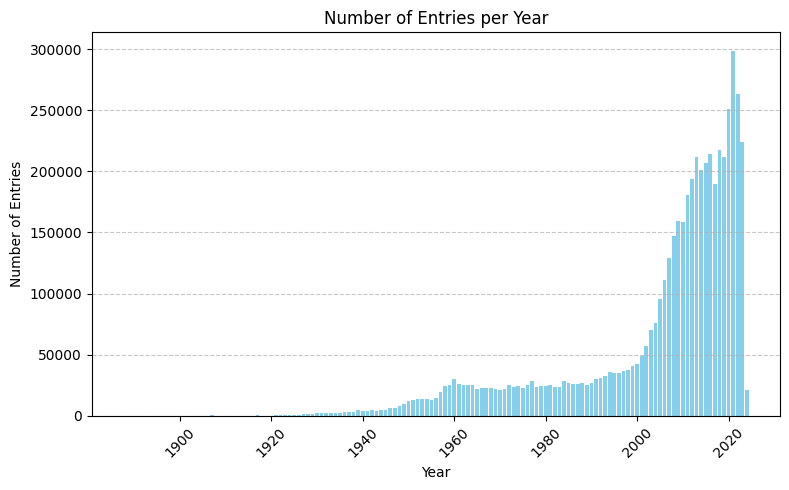

In [ ]:
import matplotlib.pyplot as plt

yearly_count_pd = yearly_count_sorted.toPandas()

# Plotting the data
plt.figure(figsize=(8, 5))
plt.bar(yearly_count_pd['year'], yearly_count_pd['number_of_entries'], color='skyblue')
plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from pyspark.sql.functions import countDistinct

unique_site_counts = df.groupBy("year").agg(countDistinct("site_code").alias("unique_site_count"))
unique_site_counts_pd = unique_site_counts.toPandas()
unique_site_counts_pd_sorted = unique_site_counts_pd.sort_values(by='year')

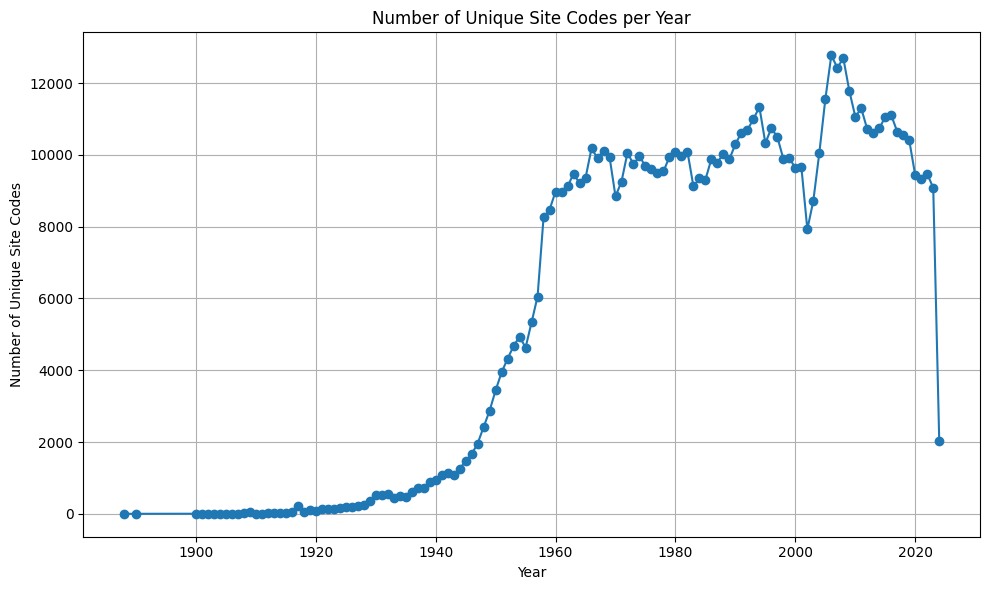

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(unique_site_counts_pd_sorted['year'], unique_site_counts_pd_sorted['unique_site_count'], marker='o')
plt.title('Number of Unique Site Codes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Site Codes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

###Exploring Maps

Exploring distributions by county

In [ ]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.0 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
shp_file_path = "ca_county_file/ca_county_boundaries.dbf"
county_map = gpd.read_file(shp_file_path)


shp_file_path = "ca_county_file/ca_county_boundaries.shx"
county_map = gpd.read_file(shp_file_path)
county_map.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'GEOIDFQ', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [ ]:
unique_counties = df.select('county_name').distinct()

In [ ]:
name_1 = county_map['NAME'].tolist()
unique_counties= unique_counties.toPandas()
name_2 = unique_counties['county_name'].tolist()

for i in name_1:
  if i not in name_2:
    print(i)

print("\n.........................\n")
for i in name_2:
  if i not in name_1:
    print(i)

Trinity

.........................



In [ ]:
from pyspark.sql.functions import countDistinct

# Group by county_name and count distinct site_codes
unique_sites_per_county = sites.groupBy('county_name').agg(countDistinct('site_code').alias('unique_site_count_per_county'))

# Show the result
unique_sites_per_county.toPandas()

,county_name,unique_site_count_per_county
0,Plumas,152
1,Kings,1475
2,Marin,7
3,Inyo,327
4,Sonoma,457
5,Napa,182
6,Madera,1086
7,Siskiyou,229
8,Ventura,1317
9,Orange,613


In [ ]:
distinct_site_locations = df.groupBy('site_code').agg({'latitude': 'first', 'longitude': 'first'})
distinct_site_locations = distinct_site_locations.toPandas()

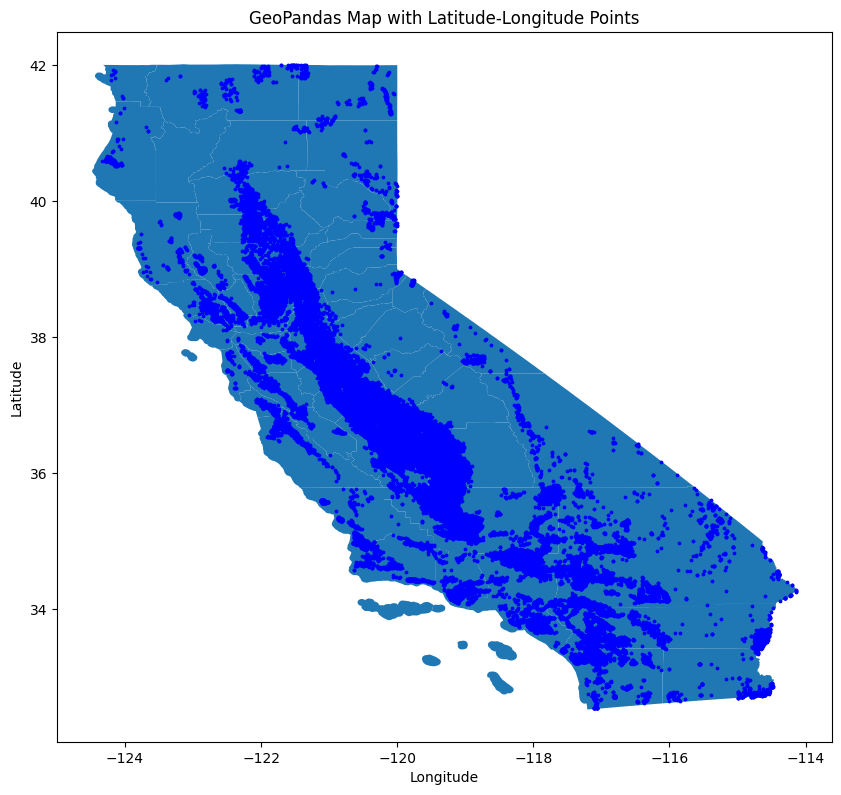

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
county_map.plot(ax=ax)

geometry = gpd.points_from_xy(distinct_site_locations['first(longitude)'], distinct_site_locations['first(latitude)'])
gdf = gpd.GeoDataFrame(distinct_site_locations, geometry=geometry)

gdf.plot(ax=ax, markersize=3, color='blue', marker='o', label='Wells')  # Show plot of wells

plt.title('GeoPandas Map with Latitude-Longitude Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

Exploring Distributions by city

In [ ]:
!pip install geopandas shapely

In [ ]:
shp_file_path = "City_Boundaries/City_Boundaries.shx"
city_map = gpd.read_file(shp_file_path)
shp_file_path = "City_Boundaries/City_Boundaries.dbf"
city_map = gpd.read_file(shp_file_path)

city_map

,OBJECTID,COUNTY,CITY,Shape__Are,Shape__Len,GlobalID,geometry
0,1,San Bernardino,Adelanto,2.025272e+08,122818.299432,a112aaa2-6c60-4c6f-83c5-5a03126064e8,"MULTIPOLYGON (((-13067991.331 4112789.226, -13..."
1,2,Los Angeles,Agoura Hills,2.964318e+07,29626.940723,b9192abb-2d64-4f7b-b9dc-97b8a703521b,"POLYGON ((-13215828.688 4047115.804, -13215828..."
2,3,Alameda,Alameda,4.358305e+07,52137.876912,b8a7f28a-a71e-4e96-bd7e-78cf84f27f7d,"MULTIPOLYGON (((-13617731.274 4550805.581, -13..."
3,4,Alameda,Albany,7.558117e+06,16774.017561,f25071bd-a3d2-437a-bdf4-2d25a0aea1f4,"POLYGON ((-13613046.493 4565026.598, -13613003..."
4,5,Los Angeles,Alhambra,2.888338e+07,25461.487633,a74ff6de-81a9-4d98-b4dc-a1f9d9730f4b,"POLYGON ((-13149179.830 4042959.059, -13148716..."
...,...,...,...,...,...,...,...
477,478,Napa,Yountville,6.139924e+06,18166.776479,735a240a-584d-4627-8090-a2e92033d000,"POLYGON ((-13620669.817 4636906.587, -13620650..."
478,479,Siskiyou,Yreka,4.679887e+07,64683.190766,a1a1efeb-3906-417a-812e-2184e2101bd5,"POLYGON ((-13646382.898 5126329.073, -13646380..."
479,480,Sutter,Yuba City,6.630216e+07,74665.952003,060e429b-d220-42b0-82c9-bb07aa3ceb8b,"POLYGON ((-13537051.239 4743120.280, -13537055..."
480,481,San Bernardino,Yucaipa,1.068584e+08,66660.772363,048cc48d-99e6-4541-97c5-27b43a221a05,"POLYGON ((-13023938.262 4029406.072, -13024024..."


In [ ]:
city_map.set_crs('epsg:3857', inplace=True)
city_map = city_map.to_crs(epsg=4326)

In [ ]:
from shapely.geometry import Point


distinct_site_locations = distinct_site_locations.rename(columns={'first(latitude)': 'latitude', 'first(longitude)': 'longitude'})

gdf_points = gpd.GeoDataFrame(
    distinct_site_locations,
    geometry=[Point(xy) for xy in zip(distinct_site_locations['longitude'], distinct_site_locations['latitude'])],
    crs='epsg:4326'
)

In [ ]:
joined = gpd.sjoin(gdf_points, city_map, how='left', op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
dsl = distinct_site_locations
dsl['is_inside'] = joined['index_right'].notna()
value_counts = dsl['is_inside'].value_counts()

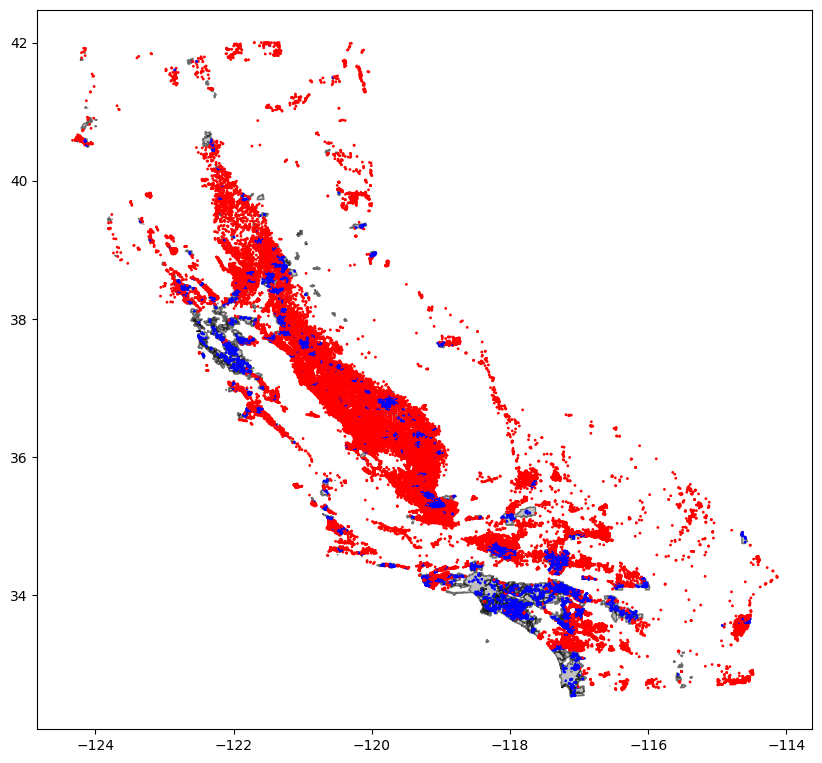

In [ ]:
geometry = gpd.points_from_xy(dsl['longitude'], dsl['latitude'])
gdf = gpd.GeoDataFrame(dsl, geometry=geometry)

gdf['color'] = gdf['is_inside'].map({True: 'blue', False: 'red'})

fig, ax = plt.subplots(figsize=(10, 10))

city_map.plot(ax=ax, color='grey', edgecolor='black', alpha=0.5)

gdf.plot(ax=ax, markersize=1, color=gdf['color'], marker='o', label='Wells')


plt.show()

In [ ]:
dsl_spark = spark.createDataFrame(dsl)
df = df.join(dsl_spark.select('site_code', 'is_inside'), on='site_code', how='left')
df = df.withColumnRenamed('is_inside', 'in_city')

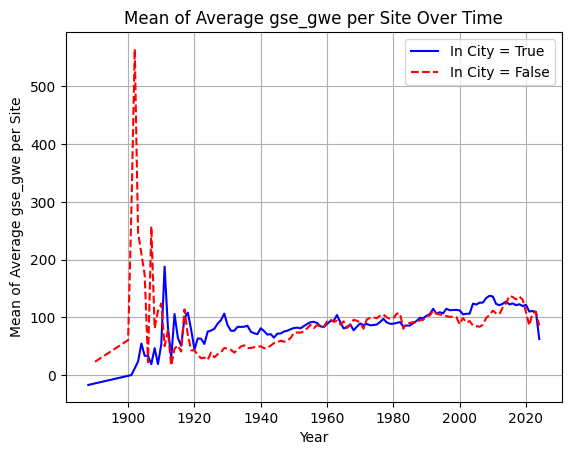

In [ ]:
from pyspark.sql.functions import avg


avg_gse_gwe_per_site_per_year_true = df.filter(df.in_city == True).groupBy('site_code', 'year').agg(avg('gse_gwe').alias('avg_gse_gwe_true'))
avg_gse_gwe_per_site_per_year_false = df.filter(df.in_city == False).groupBy('site_code', 'year').agg(avg('gse_gwe').alias('avg_gse_gwe_false'))
mean_avg_gse_gwe_per_year_true = avg_gse_gwe_per_site_per_year_true.groupBy('year').agg(avg('avg_gse_gwe_true').alias('mean_avg_gse_gwe_true'))
mean_avg_gse_gwe_per_year_false = avg_gse_gwe_per_site_per_year_false.groupBy('year').agg(avg('avg_gse_gwe_false').alias('mean_avg_gse_gwe_false'))
mean_avg_gse_gwe_per_year_true_sorted = mean_avg_gse_gwe_per_year_true.sort('year')
mean_avg_gse_gwe_per_year_false_sorted = mean_avg_gse_gwe_per_year_false.sort('year')

years_true_sorted = mean_avg_gse_gwe_per_year_true_sorted.select('year').rdd.flatMap(lambda x: x).collect()
mean_gse_gwe_values_true_sorted = mean_avg_gse_gwe_per_year_true_sorted.select('mean_avg_gse_gwe_true').rdd.flatMap(lambda x: x).collect()

years_false_sorted = mean_avg_gse_gwe_per_year_false_sorted.select('year').rdd.flatMap(lambda x: x).collect()
mean_gse_gwe_values_false_sorted = mean_avg_gse_gwe_per_year_false_sorted.select('mean_avg_gse_gwe_false').rdd.flatMap(lambda x: x).collect()

plt.plot(years_true_sorted, mean_gse_gwe_values_true_sorted, label='In City = True', color='blue', linestyle='-')
plt.plot(years_false_sorted, mean_gse_gwe_values_false_sorted, label='In City = False', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Mean of Average gse_gwe per Site')
plt.title('Mean of Average gse_gwe per Site Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Relationship between Average of GSE and Average of GWE by Site

The plot shows that GWE and GSE are linearly correlated. The color and value of each dot describes the average water measurement quality of a well. Value of zero means the measurement is quite accurate on average in measuring the GWE and GSE, and vice versa. It can be seen that light-colored points are more dominant than the dark-colored points. Hence, we can conclude that for most of the time, the wells' GWE and GSE data are reliable.

In [ ]:
# Convert 'wlm_qa_desc' categorical values into numeric and store the result into a new column called 'water_quality' using StringIndexer
idx = StringIndexer(inputCol="wlm_qa_desc", outputCol="water_measurement_quality")

# Remove rows with null value at 'wlm_qa_desc' column
filtered_df = df.filter(df['wlm_qa_desc'].isNotNull())

# Fit and transform StringIndexer to the filtered df
new_df = idx.fit(filtered_df).transform(filtered_df)

In [ ]:
# Group the data by 'site_code' and calculate the average of gse, gwe, and water quality
avg_gse_df = df.groupBy('site_code').avg('wlm_gse')
avg_gwe_df = df.groupBy('site_code').avg('gwe')
avg_water_quality = new_df.groupBy('site_code').avg('water_measurement_quality')

# Join tables
join_avg_gse_gwe_df = avg_gse_df.join(avg_gwe_df, avg_gse_df["site_code"] == avg_gwe_df["site_code"], "inner")
join_avg_gse_gwe_df = join_avg_gse_gwe_df.drop(avg_gse_df['site_code'])
join_avg_gse_gwe_df = join_avg_gse_gwe_df.join(avg_water_quality, avg_water_quality["site_code"] == join_avg_gse_gwe_df["site_code"], "inner")

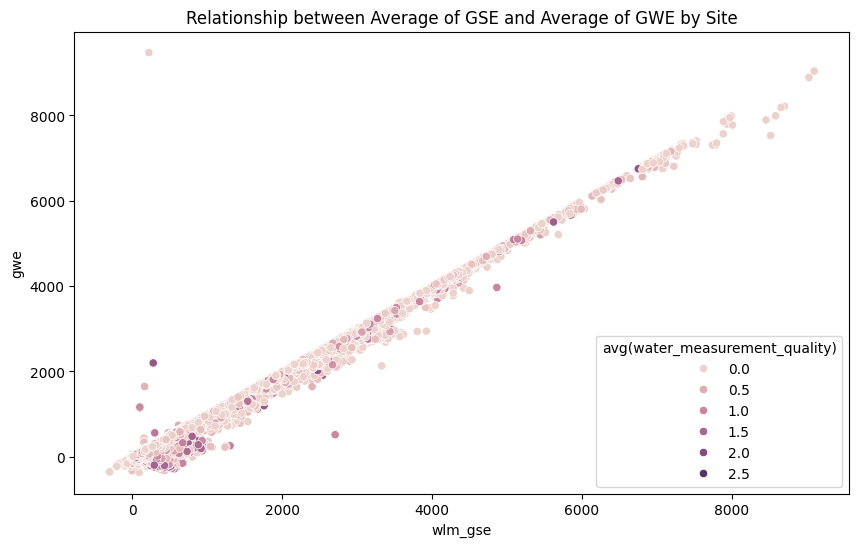

In [ ]:
# Plot the result in a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg(wlm_gse)', y='avg(gwe)', data=join_avg_gse_gwe_df.toPandas(), hue = 'avg(water_measurement_quality)')
plt.xlabel('wlm_gse')
plt.ylabel('gwe')
plt.title('Relationship between Average of GSE and Average of GWE by Site')
plt.show()

### The Average of GWE between Each Surface Level within 1960 - 2023

In [ ]:
import pandas as pd

# Filter the DataFrame for selected years
filtered_df = df.filter((df['year'] >= 1960) & (df['year'] <= 2023))

pivoted_df = filtered_df.groupBy("site_code").pivot("year").agg({"GWE": "avg"}).orderBy("site_code")

# Define a list of years from the columns of the pivoted DataFrame
years = pivoted_df.columns[1:]

# Calculate median for each diff_year
mean_values = pivoted_df.select([col(year).alias(year) for year in years]) \
                      .summary("mean").drop("summary") \
                      .toPandas().iloc[0]

# Convert median_values to a Pandas DataFrame
mean_df = pd.DataFrame({"year": mean_values.index, "mean": mean_values.values})

# Convert median values to numeric and handle null values
mean_df["mean"] = pd.to_numeric(mean_df["mean"], errors="coerce")
mean_df["mean"] = mean_df["mean"].fillna(0)

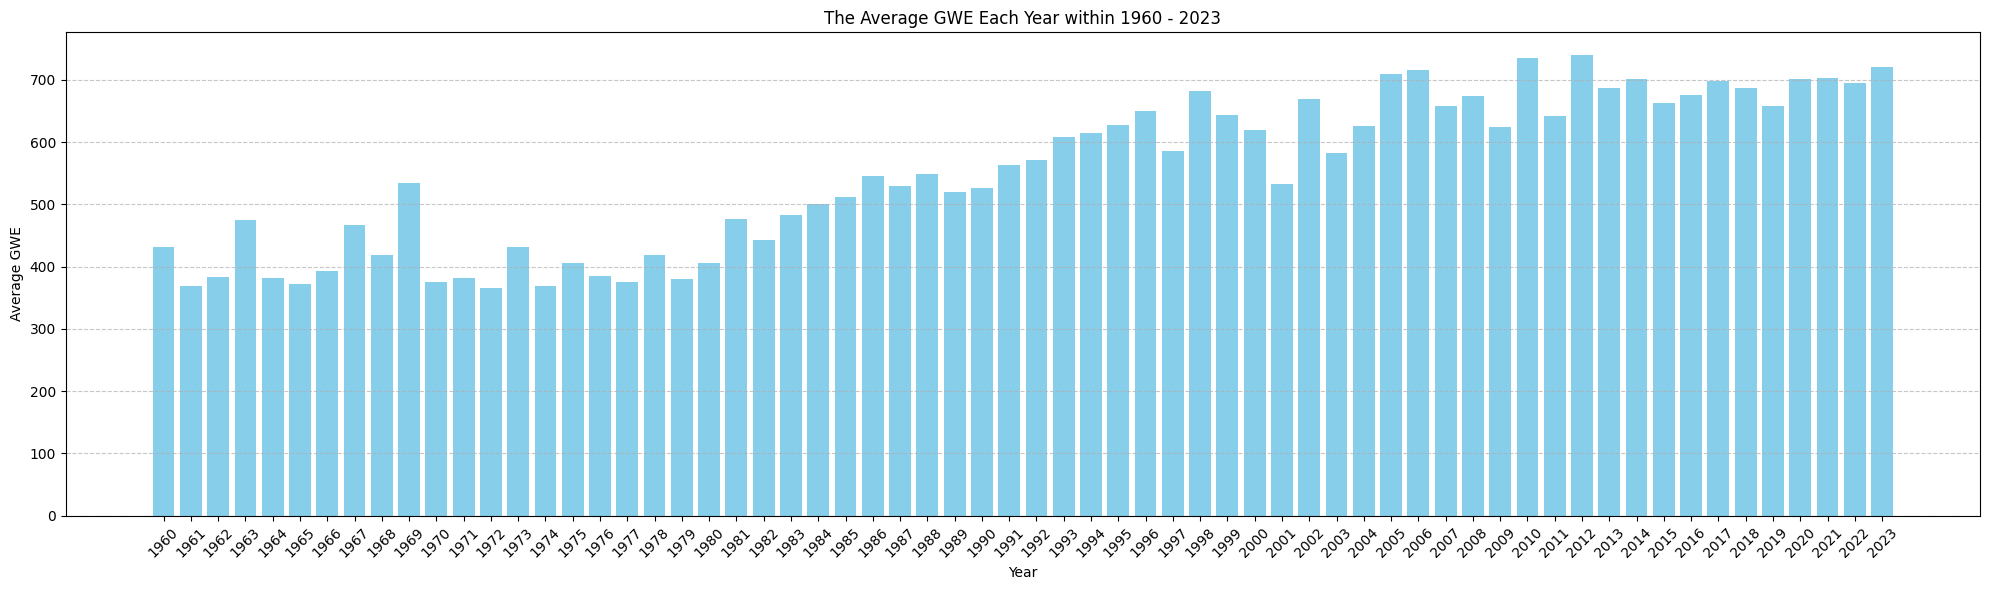

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(mean_df['year'], mean_df['mean'], color='skyblue')
plt.title('The Average GWE Each Year within 1960 - 2023')
plt.xlabel('Year')
plt.ylabel('Average GWE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df.select("county_name").distinct().show()

+-------------+
|  county_name|
+-------------+
|       Plumas|
|        Kings|
|        Marin|
|         Inyo|
|       Sonoma|
|         Napa|
|       Madera|
|      Ventura|
|       Orange|
|  Los Angeles|
|   Sacramento|
|         Lake|
|   Stanislaus|
|    Calaveras|
|    San Diego|
|San Francisco|
|    El Dorado|
|   Santa Cruz|
|  Santa Clara|
|  San Joaquin|
+-------------+
only showing top 20 rows



### The Average of GSE_GWE between Each Surface Level within 1960 - 2023

In [ ]:
# Filter the DataFrame for selected years
filtered_df = df.filter((df['year'] >= 1960) & (df['year'] <= 2023))

# Group by site_code and pivot by year
pivoted_df = filtered_df.groupBy("site_code").pivot("year").agg({"GSE_GWE": "avg"}).orderBy("site_code")

# Show the pivoted DataFrame
pivoted_df.show()

+------------------+-----+------------------+-----+------+-----+-----+------+------------------+------------------+------+-----+-----+----+----+----+----+----+----+-----+----+----+-----+----+------------------+----+----+----+----+----+----+----+----+----+----+----+------------------+------------------+----+----+----+----+----+----+----+----+------------------+------------------+------------------+------------------+------------------+------------------+-----+-----+------------------+-----+------+-----------------+------------------+------------------+------+------+-----+----+------+
|         site_code| 1960|              1961| 1962|  1963| 1964| 1965|  1966|              1967|              1968|  1969| 1970| 1971|1972|1973|1974|1975|1976|1977| 1978|1979|1980| 1981|1982|              1983|1984|1985|1986|1987|1988|1989|1990|1991|1992|1993|1994|              1995|              1996|1997|1998|1999|2000|2001|2002|2003|2004|              2005|              2006|              2007|          

In [ ]:
import pandas as pd

# Define a list of years from the columns of the pivoted DataFrame
years = pivoted_df.columns[1:]

# Calculate median for each diff_year
mean_values = pivoted_df.select([col(year).alias(year) for year in years]) \
                      .summary("mean").drop("summary") \
                      .toPandas().iloc[0]

# Convert median_values to a Pandas DataFrame
mean_df = pd.DataFrame({"year": mean_values.index, "mean": mean_values.values})

# Convert median values to numeric and handle null values
mean_df["mean"] = pd.to_numeric(mean_df["mean"], errors="coerce")
mean_df["mean"] = mean_df["mean"].fillna(0)

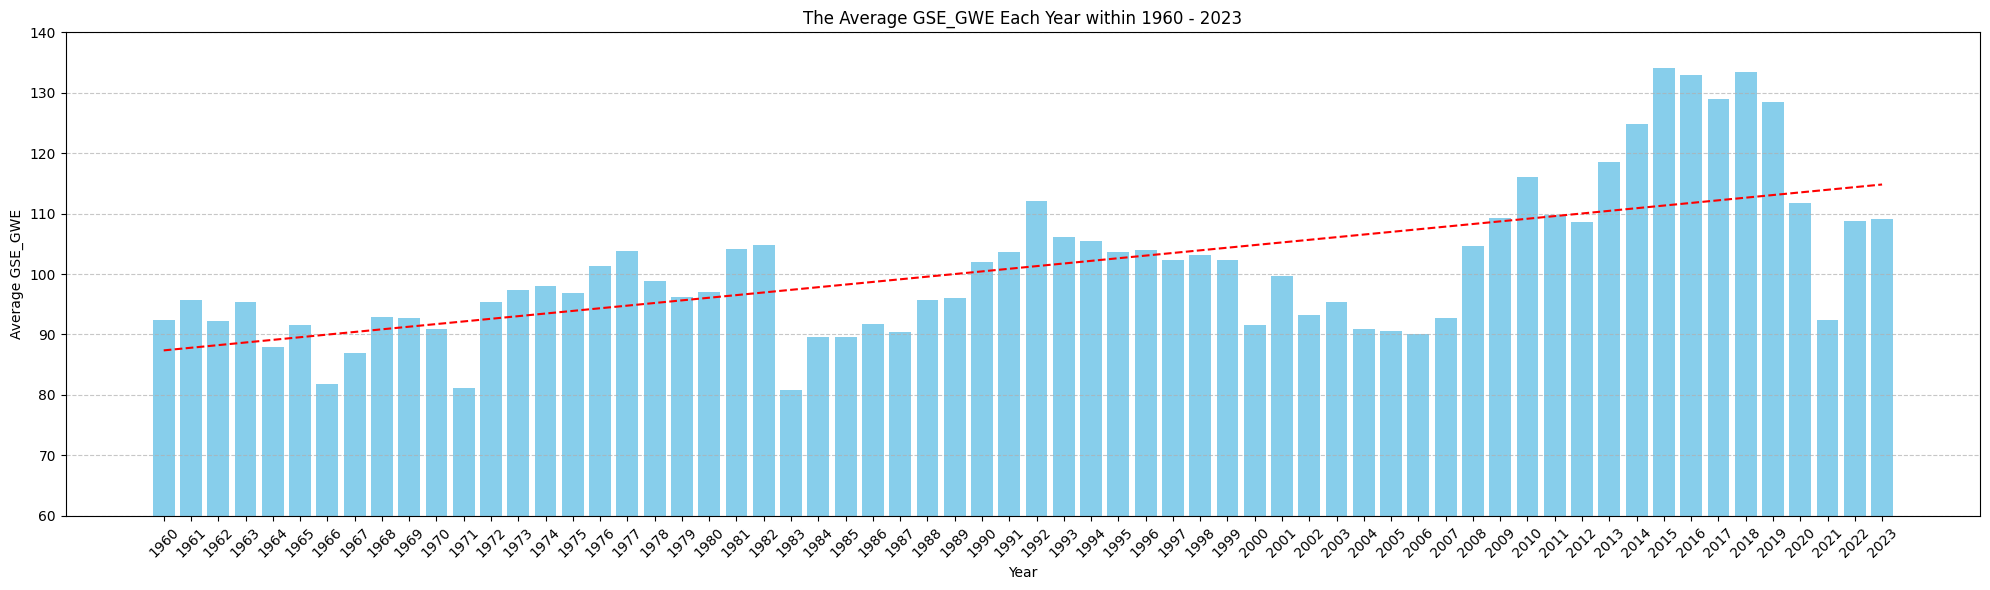

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

slope, intercept, _, _, _ = linregress(mean_df.index, mean_df["mean"])
regression_line = slope * mean_df.index + intercept

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(mean_df['year'], mean_df['mean'], color='skyblue')
plt.plot(mean_df["year"], regression_line, color='red', linestyle='--', label='Trend Line')
plt.title('The Average GSE_GWE Each Year within 1960 - 2023')
plt.xlabel('Year')
plt.ylabel('Average GSE_GWE')
plt.ylim(60, 140) # "y-axis scaling" or "y-axis limits."
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plot the Average of GSE_GWE of Sutter within 1960 - 2023

In [ ]:
# Filter the DataFrame for selected years
filtered_continuous_df = df.filter((df['year'] >= 1960) & (df['year'] <= 2023) & (df['county_name'] == 'Sutter') & (df['source'] == 'DWR_CONTINUOUS'))

# Group by site_code and pivot by year
pivoted_continuous_df = filtered_continuous_df.groupBy("site_code").pivot("year").agg({"GSE_GWE": "avg"}).orderBy("site_code")

# Show the pivoted DataFrame
pivoted_continuous_df.show()

+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|         site_code|              1994|              1995|             1996|              1997|              1998|              1999|              2000|              2001|              2002|              2003|             2004|             2005|              2006|              2007|              2008|              2009|              2010|              2011|              2012|              2013|              2

In [ ]:
import pandas as pd

# Define a list of years from the columns of the pivoted DataFrame
years = pivoted_continuous_df.columns[1:]

# Calculate median for each diff_year
mean_values = pivoted_continuous_df.select([col(year).alias(year) for year in years]) \
                      .summary("mean").drop("summary") \
                      .toPandas().iloc[0]

# Convert median_values to a Pandas DataFrame
mean_df = pd.DataFrame({"year": mean_values.index, "mean": mean_values.values})

# Convert median values to numeric and handle null values
mean_df["mean"] = pd.to_numeric(mean_df["mean"], errors="coerce")
mean_df["mean"] = mean_df["mean"].fillna(0)

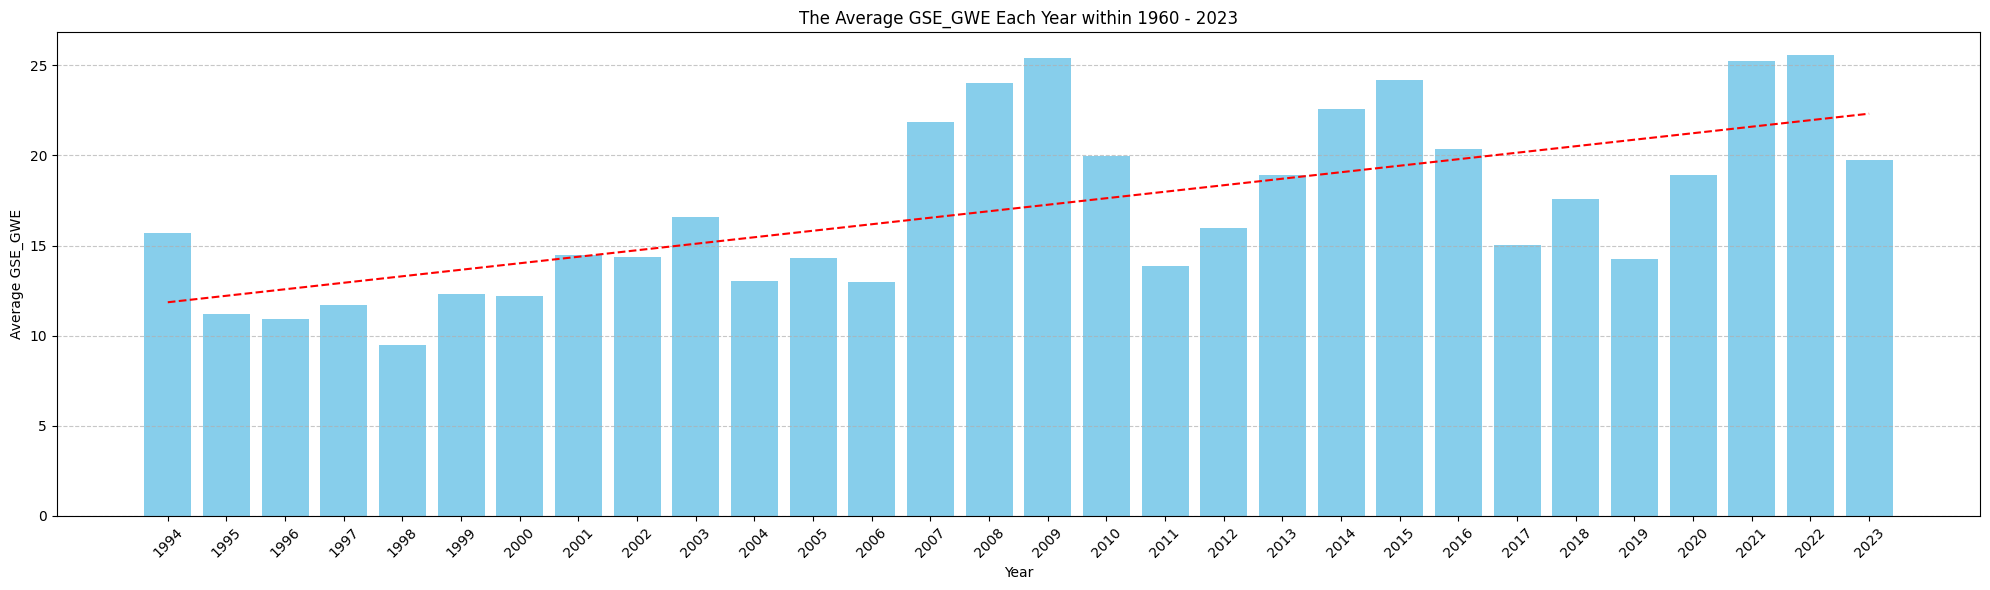

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

slope, intercept, _, _, _ = linregress(mean_df.index, mean_df["mean"])
regression_line = slope * mean_df.index + intercept

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(mean_df['year'], mean_df['mean'], color='skyblue')
plt.plot(mean_df["year"], regression_line, color='red', linestyle='--', label='Trend Line')
plt.title('The Average GSE_GWE Each Year within 1960 - 2023')
plt.xlabel('Year')
plt.ylabel('Average GSE_GWE')
# plt.ylim(60, 140) # "y-axis scaling" or "y-axis limits."
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### The Difference between Each Surface Level within 1960 - 2023

#### By site_code

In [ ]:
# Filter the DataFrame for selected years
filtered_df = df.filter((df['year'] >= 1960) & (df['year'] <= 2023))

# Group by site_code and pivot by year
pivoted_df = filtered_df.groupBy("site_code").pivot("year").agg({"GWE": "avg"}).orderBy("site_code")

# Show the pivoted DataFrame
pivoted_df.show()

+------------------+------------------+-------+-----+------+-----+-----+------+------------------+------------------+------------------+-----------------+----+----+----+----+----+----+----+-----+-----+-----+------+-----+------------------+----+----+----+----+----+----+----+----+----+----+----+-------------------+-------------------+----+----+----+----+----+----+----+----+------------------+-------------------+-------------------+-------------------+------------------+------------------+-----+-----+-----+------------------+------+------------------+------------------+------------------+------------------+------+------+-----+------------------+
|         site_code|              1960|   1961| 1962|  1963| 1964| 1965|  1966|              1967|              1968|              1969|             1970|1971|1972|1973|1974|1975|1976|1977| 1978| 1979| 1980|  1981| 1982|              1983|1984|1985|1986|1987|1988|1989|1990|1991|1992|1993|1994|               1995|               1996|1997|1998|1999|

In [ ]:
from pyspark.sql.functions import col
na_df = pivoted_df.filter(col("1960").isNull())
na_df.count()

33426

In [ ]:
from pyspark.sql.functions import lag, lead, col
from pyspark.sql.window import Window

# Define a list of years from the columns of the pivoted DataFrame
years = pivoted_df.columns[1:]

# Calculate difference between consecutive years for each name dynamically
diff_exprs = [(col(years[i+1]) - col(years[i])).alias(f"Diff_{years[i]}_{years[i+1]}") for i in range(len(years)-1)]

# Select name and difference columns
diff_df = pivoted_df.select(col("site_code"), *diff_exprs)

# Show the differences DataFrame
diff_df.show()

+------------------+-------------------+------------------+--------------+-------------------+------------------+--------------+-----------------+-------------------+-----------------+------------------+-------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+------------------+-------------------+------------------+------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+------

##### Plot the Average Difference of GWE between Each Surface Level within 1960 - 2023

In [ ]:
import pandas as pd

diff_years = [col for col in diff_df.columns if col != "site_code"]

# Calculate median for each diff_year
mean_values = diff_df.select([col(year).alias(year) for year in diff_years]) \
                      .summary("mean").drop("summary") \
                      .toPandas().iloc[0]

# Convert median_values to a Pandas DataFrame
mean_df = pd.DataFrame({"year": mean_values.index, "mean": mean_values.values})

# Convert median values to numeric and handle null values
mean_df["mean"] = pd.to_numeric(mean_df["mean"], errors="coerce")
mean_df["mean"] = mean_df["mean"].fillna(0)

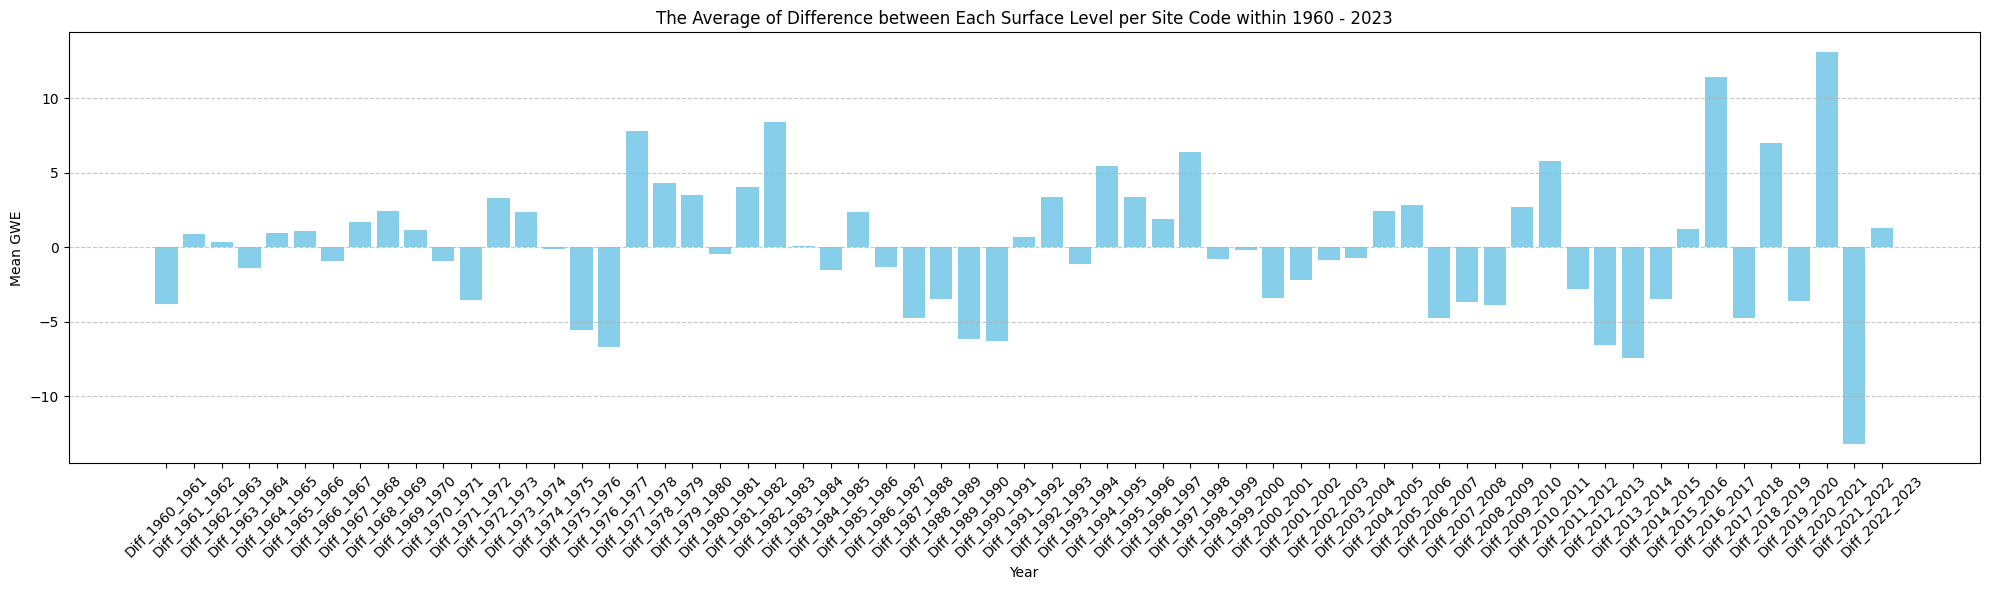

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(mean_df['year'], mean_df['mean'], color='skyblue')
plt.title('The Average of Difference between Each Surface Level per Site Code within 1960 - 2023')
plt.xlabel('Year')
plt.ylabel('Mean GWE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Plot the Median Difference of GWE between Each Surface Level within 1960 - 2023

In [ ]:
import pandas as pd

diff_years = [col for col in diff_df.columns if col != "site_code"]

# Calculate median for each diff_year
median_values = diff_df.select([col(year).alias(year) for year in diff_years]) \
                      .summary("50%").drop("summary") \
                      .toPandas().iloc[0]

# Convert median_values to a Pandas DataFrame
median_df = pd.DataFrame({"year": median_values.index, "median": median_values.values})

# Convert median values to numeric and handle null values
median_df["median"] = pd.to_numeric(median_df["median"], errors="coerce")
median_df["median"] = median_df["median"].fillna(0)

In [ ]:
median_df.isnull().sum()

year      0
median    0
dtype: int64

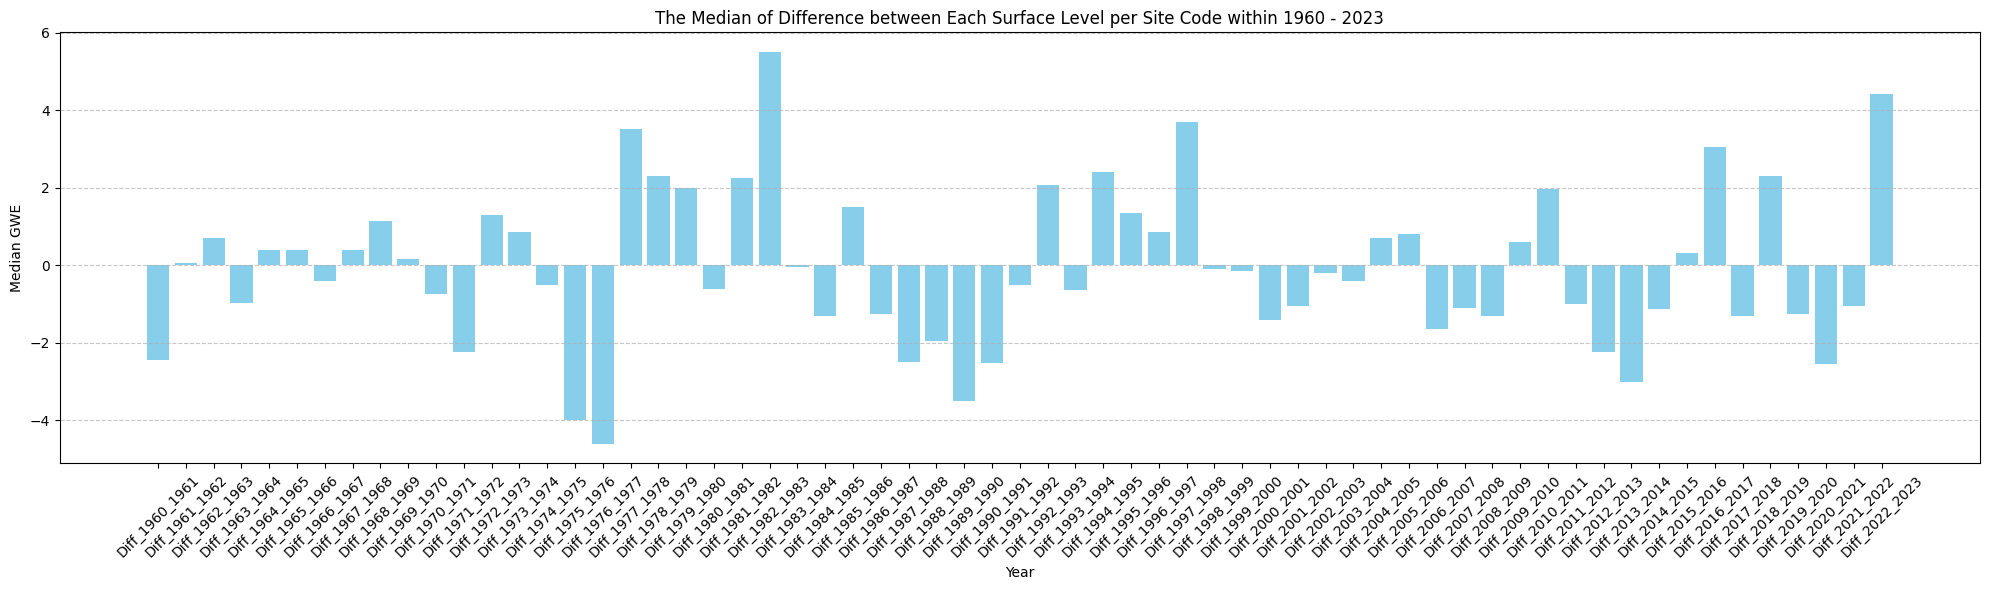

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(median_df['year'], median_df['median'], color='skyblue')
plt.title('The Median of Difference between Each Surface Level per Site Code within 1960 - 2023')
plt.xlabel('Year')
plt.ylabel('Median GWE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### By county_name

In [ ]:
# Filter the DataFrame for selected years
filtered_df = df.filter((df['year'] >= 1960) & (df['year'] <= 2023))

# Group by site_code and pivot by year
pivoted_county_df = filtered_df.groupBy("county_name").pivot("year").agg({"GWE": "avg"}).orderBy("county_name")

# Show the pivoted DataFrame
# pivoted_county_df.show()

In [ ]:
from pyspark.sql.functions import lag, lead, col
from pyspark.sql.window import Window

# Define a list of years from the columns of the pivoted DataFrame
years = pivoted_county_df.columns[1:]

# Calculate difference between consecutive years for each name dynamically
diff_exprs = [(col(years[i+1]) - col(years[i])).alias(f"Diff_{years[i]}_{years[i+1]}") for i in range(len(years)-1)]

# Select name and difference columns
diff_county_df = pivoted_county_df.select(col("county_name"), *diff_exprs)

# Show the differences DataFrame
# diff_county_df.show()

##### Transpose diff_county_df

In [ ]:
from pyspark.sql.functions import expr

# Define the columns to stack dynamically
columns_to_stack = [col for col in diff_county_df.columns if col != "county_name"]

# Stack the columns into a single column with key-value pairs
stacked_df = diff_county_df.selectExpr("county_name", "stack({}, {}) as (year, diff_gwe)".format(len(columns_to_stack), ", ".join(["'{}', {}".format(col, col) for col in columns_to_stack])))

# Display the resulting DataFrame
# stacked_df.show()

##### Plot the Average Difference of GWE between Each Surface Level within 1960 - 2023

In [ ]:
import pandas as pd

diff_years = [col for col in diff_county_df.columns if col != "county_name"]

# Calculate median for each diff_year
mean_values = diff_county_df.select([col(year).alias(year) for year in diff_years]) \
                      .summary("mean").drop("summary") \
                      .toPandas().iloc[0]

# Convert median_values to a Pandas DataFrame
mean_df = pd.DataFrame({"year": mean_values.index, "mean": mean_values.values})

# Convert median values to numeric and handle null values
mean_df["mean"] = pd.to_numeric(mean_df["mean"], errors="coerce")
mean_df["mean"] = mean_df["mean"].fillna(0)

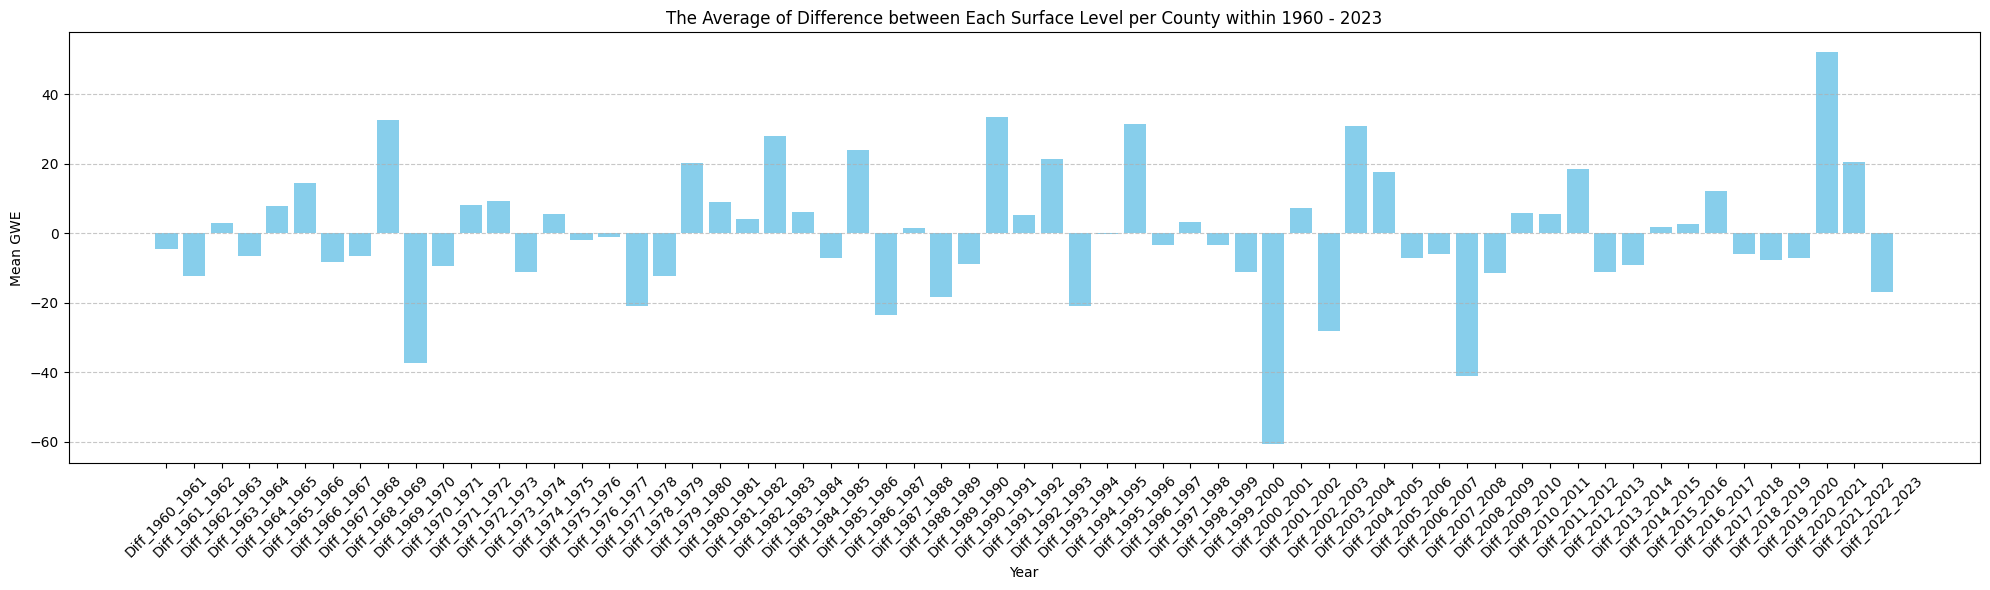

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(mean_df['year'], mean_df['mean'], color='skyblue')
plt.title('The Average of Difference between Each Surface Level per County within 1960 - 2023')
plt.xlabel('Year')
plt.ylabel('Mean GWE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Plot the Median Difference of GWE between Each Surface Level within 1960 - 2023

In [ ]:
import pandas as pd

diff_years = [col for col in diff_county_df.columns if col != "county_name"]

# Calculate median for each diff_year
median_values = diff_county_df.select([col(year).alias(year) for year in diff_years]) \
                      .summary("50%").drop("summary") \
                      .toPandas().iloc[0]

# Convert median_values to a Pandas DataFrame
median_df = pd.DataFrame({"year": median_values.index, "median": median_values.values})

# Convert median values to numeric and handle null values
median_df["median"] = pd.to_numeric(median_df["median"], errors="coerce")
median_df["median"] = median_df["median"].fillna(0)

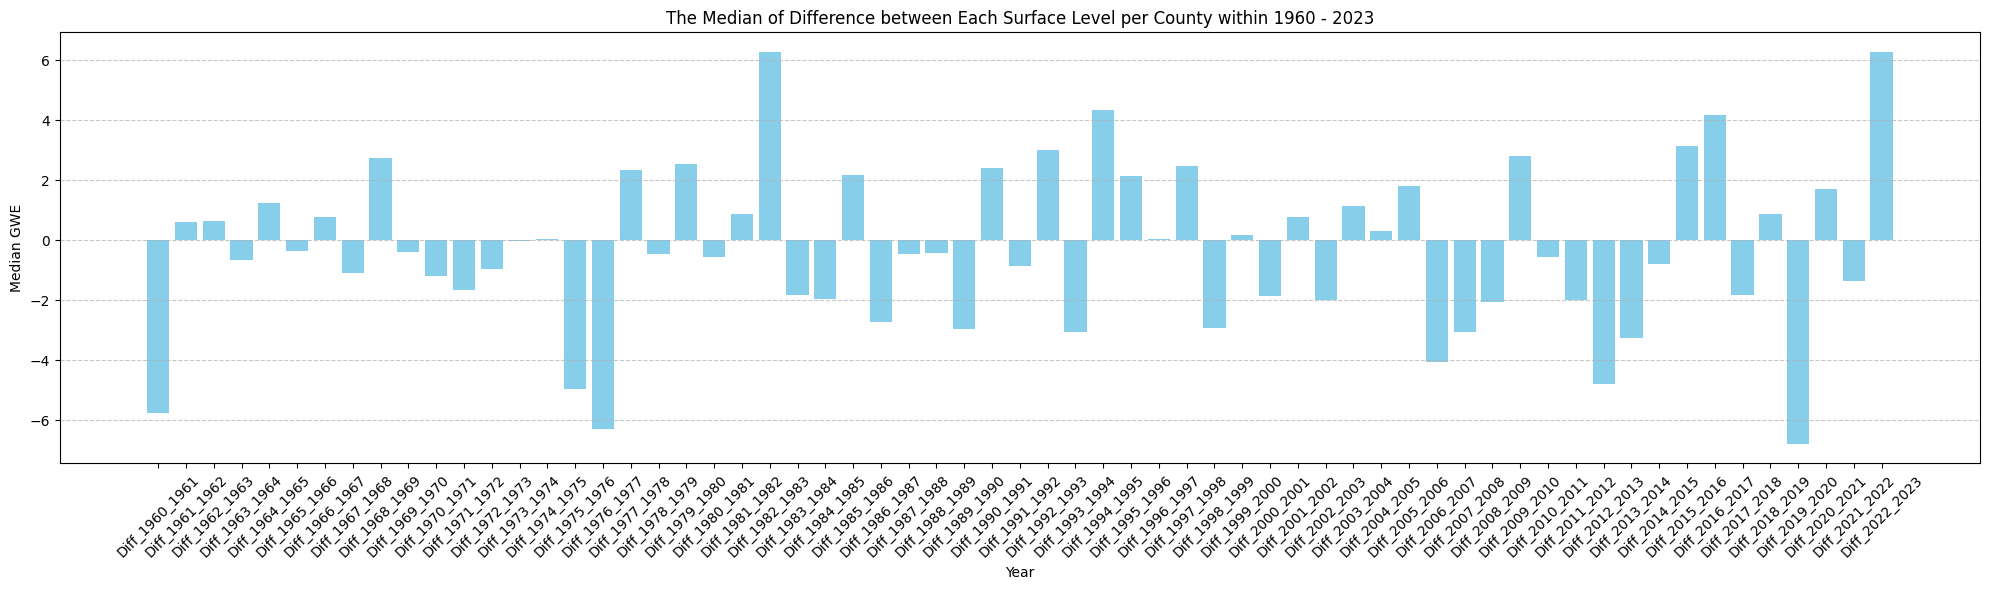

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(median_df['year'], median_df['median'], color='skyblue')
plt.title('The Median of Difference between Each Surface Level per County within 1960 - 2023')
plt.xlabel('Year')
plt.ylabel('Median GWE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Contamination Checking

In [ ]:
df2 = spark.read.csv('gama_dwr_statewide_v2.txt', sep = '\t')
first_row = df2.first()
for col_name in df2.columns:
    first_entry = first_row[col_name]
    df2 = df2.withColumnRenamed(col_name, str(first_entry))

In [ ]:
df2.show(5)

+---------------+-------------------+--------------+-------------+---------------+-------------------+------------------+---------+-----------------+------------------+-----------------------+-----------+------------+----------------+-------------------------+----------------------------+-------------+--------------+--------------+--------------+-------------------+-------------------+----------+------------------+-------------------+------------------------+------------------------+-----------------+---------------------+------------+------------+-------------+---------+-----------------+--------------------------+-----------------------------+-----------------+
|GM_DATASET_NAME|   GM_WELL_CATEGORY|GM_DATA_SOURCE|   GM_WELL_ID|GM_CHEMICAL_VVL|   GM_CHEMICAL_NAME|GM_RESULT_MODIFIER|GM_RESULT|GM_CHEMICAL_UNITS|GM_REPORTING_LIMIT|GM_SAMP_COLLECTION_DATE|GM_LATITUDE|GM_LONGITUDE|GM_WELL_DEPTH_FT|GM_TOP_DEPTH_OF_SCREEN_FT|GM_BOTTOM_DEPTH_OF_SCREEN_FT|GM_CAS_NUMBER|GM_ALTWELL_ID1|GM_ALTWELL

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

In [ ]:
df2 = df2.withColumn("row_id", monotonically_increasing_id())
first_row_id = df2.selectExpr("min(row_id)").collect()[0][0]
df2 = df2.filter(df2.row_id != first_row_id)

df2 = df2.drop("row_id")

In [ ]:
df2.show(5)

+---------------+-------------------+--------------+-------------+---------------+-------------------+------------------+---------+-----------------+------------------+-----------------------+-----------+------------+----------------+-------------------------+----------------------------+-------------+--------------+--------------+--------------+-------------------+-------------------+----------+------------------+-------------------+------------------------+------------------------+-----------------+---------------------+------------+------------+-------------+---------+-----------------+--------------------------+-----------------------------+-----------------+
|GM_DATASET_NAME|   GM_WELL_CATEGORY|GM_DATA_SOURCE|   GM_WELL_ID|GM_CHEMICAL_VVL|   GM_CHEMICAL_NAME|GM_RESULT_MODIFIER|GM_RESULT|GM_CHEMICAL_UNITS|GM_REPORTING_LIMIT|GM_SAMP_COLLECTION_DATE|GM_LATITUDE|GM_LONGITUDE|GM_WELL_DEPTH_FT|GM_TOP_DEPTH_OF_SCREEN_FT|GM_BOTTOM_DEPTH_OF_SCREEN_FT|GM_CAS_NUMBER|GM_ALTWELL_ID1|GM_ALTWELL

In [ ]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col
from pyspark.sql.functions import year, month, day, to_date

In [ ]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [ ]:
df2 = df2.withColumn("GM_LATITUDE", col("GM_LATITUDE").cast(DoubleType()))
df2 = df2.withColumn("GM_LONGITUDE", col("GM_LONGITUDE").cast(DoubleType()))
df2 = df2.withColumn("Date", to_date("SRC_SAMP_COLLECTION_DATE", "MM/dd/yyyy"))
df2 = df2.withColumn("year", year("Date"))
df2 = df2.withColumn("month", month("Date"))
df2 = df2.withColumn("day", day("Date"))
# ('SRC_SAMP_COLLECTION_DATE', 'string'),
df2.dtypes

[('GM_DATASET_NAME', 'string'),
 ('GM_WELL_CATEGORY', 'string'),
 ('GM_DATA_SOURCE', 'string'),
 ('GM_WELL_ID', 'string'),
 ('GM_CHEMICAL_VVL', 'string'),
 ('GM_CHEMICAL_NAME', 'string'),
 ('GM_RESULT_MODIFIER', 'string'),
 ('GM_RESULT', 'string'),
 ('GM_CHEMICAL_UNITS', 'string'),
 ('GM_REPORTING_LIMIT', 'string'),
 ('GM_SAMP_COLLECTION_DATE', 'string'),
 ('GM_LATITUDE', 'double'),
 ('GM_LONGITUDE', 'double'),
 ('GM_WELL_DEPTH_FT', 'string'),
 ('GM_TOP_DEPTH_OF_SCREEN_FT', 'string'),
 ('GM_BOTTOM_DEPTH_OF_SCREEN_FT', 'string'),
 ('GM_CAS_NUMBER', 'string'),
 ('GM_ALTWELL_ID1', 'string'),
 ('GM_ALTWELL_ID2', 'string'),
 ('GM_ALTWELL_ID3', 'string'),
 ('SRC_CHEMICAL', 'string'),
 ('SRC_RESULT_MODIFIER', 'string'),
 ('SRC_RESULT', 'string'),
 ('SRC_CHEMICAL_UNITS', 'string'),
 ('SRC_REPORTING_LIMIT', 'string'),
 ('SRC_SAMP_COLLECTION_DATE', 'string'),
 ('SRC_SAMP_COLLECTION_TIME', 'string'),
 ('SRC_ANALYSIS_DATE', 'string'),
 ('SRC_ANALYTICAL_METHOD', 'string'),
 ('SRC_LAB_NOTE', 'string

In [ ]:
df = df.withColumn("longitude", col("longitude").cast(DoubleType()))
df = df.withColumn("Date", to_date("msmt_date", "yyyy-MM-dd"))
df = df.withColumn("year", year("Date"))
df = df.withColumn("month", month("Date"))
df = df.withColumn("day", day("Date"))
df.dtypes

[('site_code', 'string'),
 ('msmt_date', 'string'),
 ('wlm_rpe', 'string'),
 ('wlm_gse', 'double'),
 ('gwe', 'double'),
 ('gse_gwe', 'double'),
 ('wlm_qa_desc', 'string'),
 ('wlm_qa_detail', 'string'),
 ('wlm_mthd_desc', 'string'),
 ('wlm_acc_desc', 'string'),
 ('wlm_org_name', 'string'),
 ('coop_org_name', 'string'),
 ('monitoring_program', 'string'),
 ('source', 'string'),
 ('msmt_cmt', 'string'),
 ('latitude', 'double'),
 ('longitude', 'double'),
 ('basin_code', 'string'),
 ('basin_name', 'string'),
 ('county_name', 'string'),
 ('Date', 'date'),
 ('year', 'int'),
 ('in_city', 'boolean'),
 ('month', 'int'),
 ('day', 'int')]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_pd = df.select("latitude", "longitude").distinct().toPandas()
df2_pd = df2.select("GM_LATITUDE", "GM_LONGITUDE").distinct().toPandas()

In [ ]:
matching_df = df.join(df2,       (df["latitude"] == df2["GM_LATITUDE"]) &
                                (df["longitude"] == df2["GM_LONGITUDE"]), "inner")

# Check if there are matching latitude, longitude, and year values
matching_df.show(truncate=False)

# wlm_rpe|wlm_gse|gwe |gse_gwe|source  |latitude|longitude

+------------------+-------------------+-------+-------+----+-------+-----------+-------------+-------------+------------+-----------------------------+-----------------------------+------------------+------------+--------+--------+---------+----------+-----------+-----------+----------+----+-------+-----+---+---------------+-------------------+--------------+-------------+---------------+----------------------+------------------+---------+-----------------+------------------+-----------------------+-----------+------------+----------------+-------------------------+----------------------------+-------------+--------------+--------------+--------------+----------------------+-------------------+----------+------------------+-------------------+------------------------+------------------------+-----------------+---------------------+------------+------------+-------------+---------+-----------------+--------------------------+-----------------------------+-----------------+----------+--

In [ ]:
matching_df.printSchema()

root
 |-- site_code: string (nullable = true)
 |-- msmt_date: string (nullable = true)
 |-- wlm_rpe: string (nullable = true)
 |-- wlm_gse: double (nullable = true)
 |-- gwe: double (nullable = true)
 |-- gse_gwe: double (nullable = true)
 |-- wlm_qa_desc: string (nullable = true)
 |-- wlm_qa_detail: string (nullable = true)
 |-- wlm_mthd_desc: string (nullable = true)
 |-- wlm_acc_desc: string (nullable = true)
 |-- wlm_org_name: string (nullable = true)
 |-- coop_org_name: string (nullable = true)
 |-- monitoring_program: string (nullable = true)
 |-- source: string (nullable = true)
 |-- msmt_cmt: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- basin_code: string (nullable = true)
 |-- basin_name: string (nullable = true)
 |-- county_name: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- in_city: boolean (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: 

In [ ]:
contaminated = matching_df.select("site_code").distinct().count()

In [ ]:
wells = df.select("site_code").distinct().count()

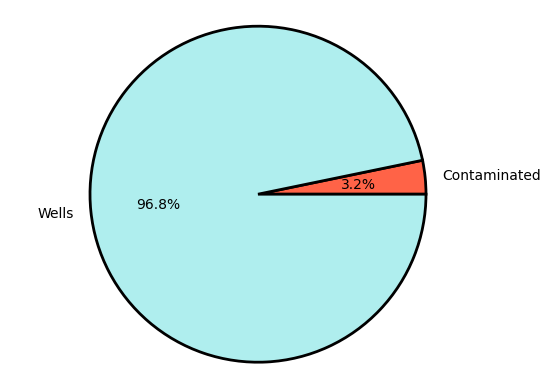

In [ ]:
plt.pie([contaminated, wells-contaminated], labels=['Contaminated', 'Wells'],
        autopct='%1.1f%%', colors=['tomato','paleturquoise'],wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2, 'antialiased': True})
plt.axis('equal')

plt.show()

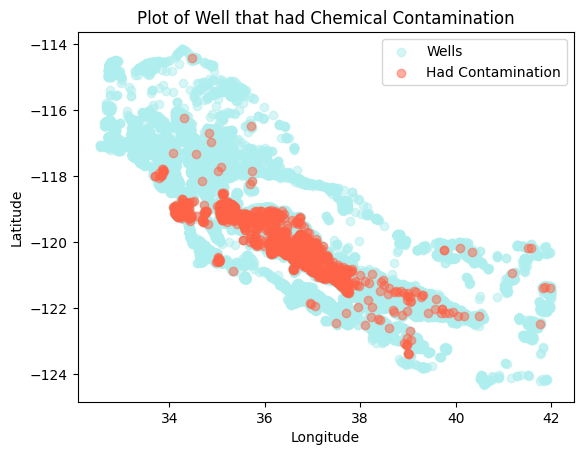

In [ ]:
matching_df_pd = matching_df.select("latitude", "longitude").distinct().toPandas()
plt.scatter(df_pd["latitude"], df_pd["longitude"], color='paleturquoise', label='Wells', alpha = 0.5)
plt.scatter(matching_df_pd["latitude"], matching_df_pd["longitude"], color='tomato', label='Had Contamination', alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of Well that had Chemical Contamination')
plt.legend()

# Show plot
plt.show()

In [ ]:
# # CODE FOR PLOTTING MAP
# geometry = gpd.points_from_xy(latlon['longitude'], latlon['latitude'])
# gdf = gpd.GeoDataFrame(latlon, geometry=geometry)
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# states = gpd.read_file('stateboundary/US_State_Boundaries.shp')
# county = gpd.read_file('countyboundaries/ca_county_boundaries.shp')

# # PLOTTING
# fig, ax = plt.subplots(figsize=(10, 10))
# world.plot(ax=ax, color='lightgray')                                    # Show world map
# states.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.5)           # Apply state border
# gdf.plot(ax=ax, markersize=3, color='blue', marker='o', label='Wells')  # Show plot of wells
# county.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.5)           # Apply county border
# minx, miny, maxx, maxy = gdf.geometry.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Geographical Distribution of Wells')
# plt.legend()
# plt.show()

In [ ]:
temp_df = df.select(['site_code', 'wlm_rpe', 'wlm_gse', 'gwe', 'gse_gwe', 'wlm_qa_desc'])
temp_df = temp_df.dropna(how='any')
temp_df.describe().toPandas().transpose()
# Select where there are all of the features in the row

,0,1,2,3,4
summary,count,mean,stddev,min,max
site_code,5087619,None,None,320000N1140000W001,419989N1217002W002
wlm_rpe,5087619,561.9939632613078,1083.9498739265669,-0.050,999.260
wlm_gse,5087619,560.6686018340123,1079.0930195047006,-300.0,9095.82
gwe,5087619,500.19318531950125,1091.9261146811725,-9800.86,233154.4
gse_gwe,5087619,60.47544633884701,215.5905533834927,-232931.4,9999.0
wlm_qa_desc,5087619,None,None,Good,Questionable


### Average Temperature Each Year

In [ ]:
avg_temp_df = spark.read.csv('avg_temp_county.csv')

In [ ]:
column_names = avg_temp_df.first()
for i, col_name in enumerate(column_names):
    avg_temp_df = avg_temp_df.withColumnRenamed(avg_temp_df.columns[i], col_name)


avg_temp_df = avg_temp_df.filter(avg_temp_df.County != 'County')

In [ ]:
import pandas as pd

num_columns = len(avg_temp_df.columns)
years = avg_temp_df.columns[64:num_columns-2]

mean_values = avg_temp_df.select([col(year).alias(year) for year in years]) \
                      .summary("mean").drop("summary") \
                      .toPandas().iloc[0]
mean_df = pd.DataFrame({"year": mean_values.index, "mean": mean_values.values})
mean_df["mean"] = pd.to_numeric(mean_df["mean"], errors="coerce")
mean_df["mean"] = mean_df["mean"].fillna(0)

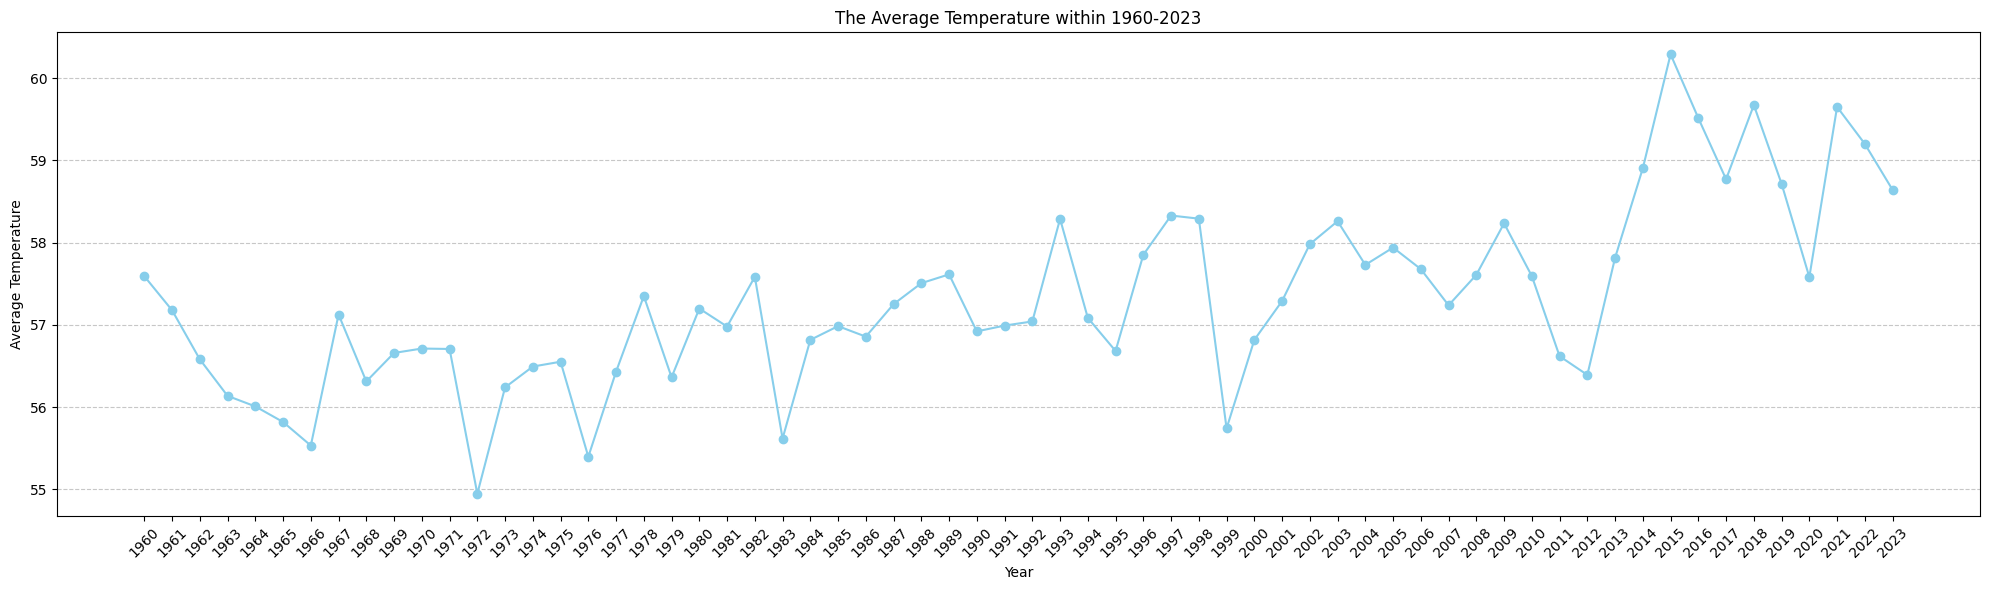

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.figure(figsize=(20, 6))
plt.plot(mean_df['year'], mean_df['mean'], color='skyblue', marker='o', linestyle='-')
plt.title('The Average Temperature within 1960-2023')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Average Precipitation Each Year

In [ ]:
precipitation_df = spark.read.csv('precipitation_county.csv')
precipitation_df.show()

+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------------------+
|  _c0|  _c1|  _c2|  _c3|  _c4|  _c5|  _c6|  _c7|  _c8|   _c9| _c10| _c11| _c12| _c13| _c14| _c15| _c16| _c17| _c18| _c19| _c20| _c21| _c22| _c23| _c24| _c25| _c26| _c27| _c28| _c29| _c30| _c31| _c32| _c3

In [ ]:
column_names = precipitation_df.first()
for i, col_name in enumerate(column_names):
    precipitation_df = precipitation_df.withColumnRenamed(precipitation_df.columns[i], col_name)

precipitation_df = precipitation_df.filter(precipitation_df.County != 'County')
precipitation_df.show()

+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------------------+
| 1896| 1897| 1898| 1899| 1900| 1901| 1902| 1903| 1904|  1905| 1906| 1907| 1908| 1909| 1910| 1911| 1912| 1913| 1914| 1915| 1916| 1917| 1918| 1919| 1920| 1921| 1922| 1923| 1924| 1925| 1926| 1927| 1928| 192

In [ ]:
import pandas as pd

num_columns = len(precipitation_df.columns)

years = precipitation_df.columns[64:num_columns-2]
mean_values = precipitation_df.select([col(year).alias(year) for year in years]) \
                      .summary("mean").drop("summary") \
                      .toPandas().iloc[0]


mean_df = pd.DataFrame({"year": mean_values.index, "mean": mean_values.values})
mean_df["mean"] = pd.to_numeric(mean_df["mean"], errors="coerce")
mean_df["mean"] = mean_df["mean"].fillna(0)

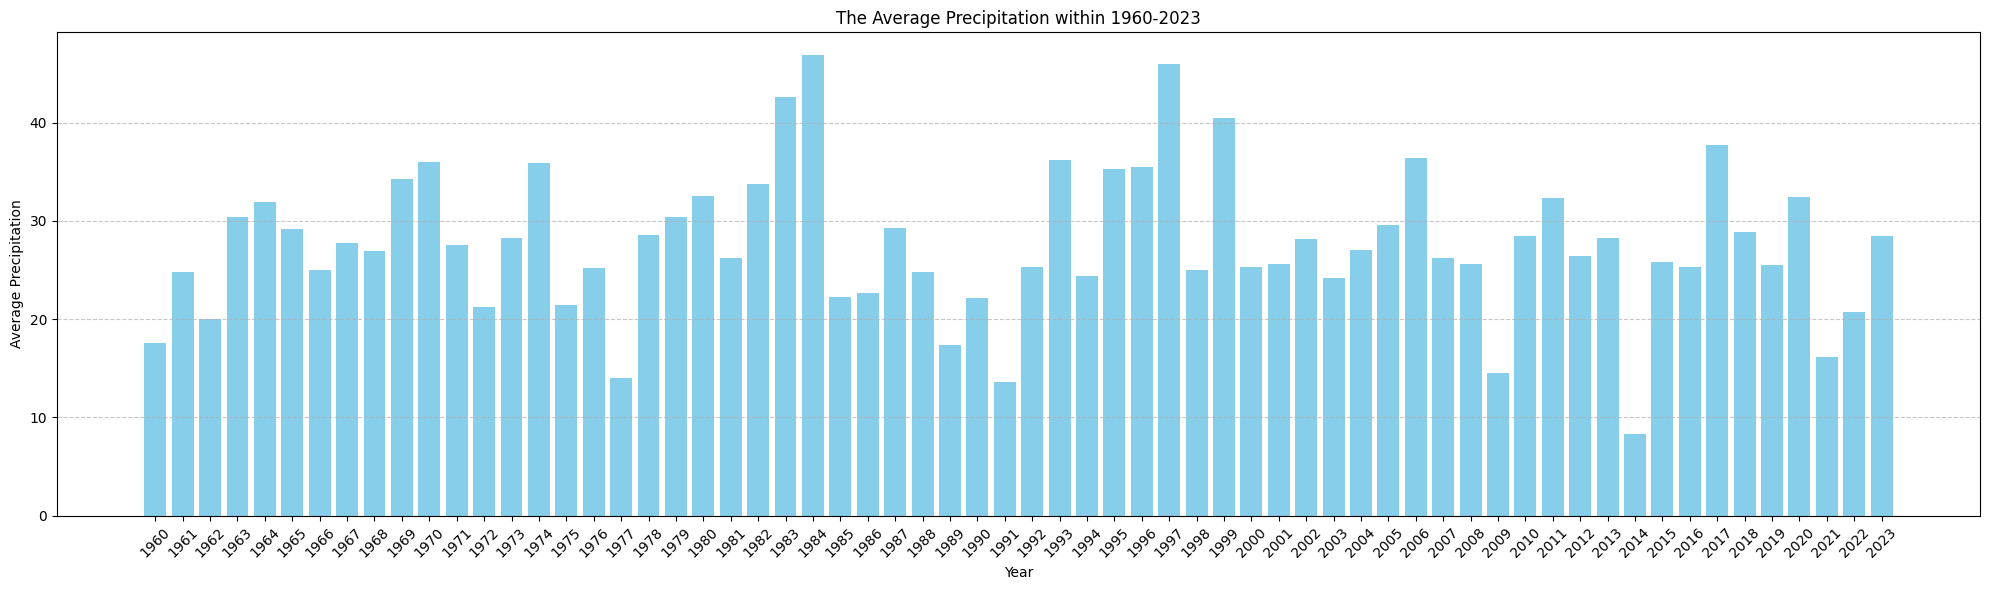

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(mean_df['year'], mean_df['mean'], color='skyblue')
plt.title('The Average Precipitation within 1960-2023')
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Random Forest Regression

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col, first, regexp_replace
from pyspark.ml.feature import StringIndexer

In [ ]:
precip = spark.read.csv('precipitation2.csv', header = True, inferSchema = True)
temp = spark.read.csv('avg_temp.csv', header = True, inferSchema = True)
names = spark.read.csv('County_names.csv', header = True, inferSchema = True)

In [ ]:
precip = precip.withColumnRenamed("Value", "Precipitation")
precip = precip.withColumnRenamed("Year", "Precipitation_Year")
precip = precip.withColumn("County", regexp_replace("County", " County", ""))

In [ ]:
temp = temp.withColumnRenamed("Value", "Temperature")
temp = temp.withColumnRenamed("Year", "Temperature_Year")
temp = temp.withColumn("County", regexp_replace("County", " County", ""))

In [ ]:
idx = StringIndexer(inputCol="County", outputCol="County_Idx")
county_idxer = idx.fit(precip)

precip = county_idxer.transform(precip)

In [ ]:
temp = county_idxer.transform(temp)

In [ ]:
precip = precip.withColumnRenamed("County", "Precipitation_County")
precip = precip.withColumnRenamed("County_Idx", "Precipitation_County_Idx")
temp = temp.withColumnRenamed("County", "Temperature_County")
temp = temp.withColumnRenamed("County_Idx", "Temperature_County_Idx")

In [ ]:
merged_temp_precip_df = precip.join(temp,(precip["Precipitation_Year"] == temp["Temperature_Year"]) &
                                (precip["Precipitation_County_Idx"] == temp["Temperature_County_Idx"]), "inner")

In [ ]:
merged_frst = merged_temp_precip_df.drop("Precipitation_Year")
merged_frst = merged_frst.drop("Precipitation_County")
merged_frst = merged_frst.drop("Precipitation_County_Idx")

In [ ]:
merged_frst.dtypes

[('Precipitation', 'double'),
 ('Temperature_Year', 'int'),
 ('Temperature', 'double'),
 ('Temperature_County', 'string'),
 ('Temperature_County_Idx', 'double')]

In [ ]:
stacked_df.dtypes

[('county_name', 'string'), ('year', 'string'), ('diff_gwe', 'double')]

In [ ]:
regexp_patterns = []

for yr in range(1960, 2023):
  regexp_pat = "Diff_" + str(yr) + "_"
  regexp_patterns.append(regexp_pat)

for pattern in regexp_patterns:
  stacked_df = stacked_df.withColumn("year", regexp_replace("year", pattern, ""))

# stacked_df.show()

In [ ]:
stacked_df = stacked_df.filter(df['county_name'] != 'Klamath, OR')
stacked_df = stacked_df.withColumnRenamed("county_name", "County")
stacked_df = county_idxer.transform(stacked_df)
stacked_df.dtypes

[('County', 'string'),
 ('year', 'string'),
 ('diff_gwe', 'double'),
 ('County_Idx', 'double')]

In [ ]:
stacked_df = stacked_df.withColumn("year", col("year").cast("int"))
stacked_df = stacked_df.withColumn("diff_gwe", col("diff_gwe").cast("double"))
stacked_df.dtypes

[('County', 'string'),
 ('year', 'int'),
 ('diff_gwe', 'double'),
 ('County_Idx', 'double')]

In [ ]:
merged_scnd = stacked_df.alias("stacked_df").join(merged_frst.alias("merged_frst"),
    (stacked_df["year"] == merged_frst["Temperature_Year"]) &
    (stacked_df["County_Idx"] == merged_frst["Temperature_County_Idx"]), "inner")

In [ ]:
merged_fin = merged_scnd.drop("Temperature_County_Idx")
merged_fin = merged_fin.drop("Temperature_County")
merged_fin = merged_fin.drop("Temperature_Year")
merged_fin.dtypes

[('County', 'string'),
 ('year', 'int'),
 ('diff_gwe', 'double'),
 ('County_Idx', 'double'),
 ('Precipitation', 'double'),
 ('Temperature', 'double')]

In [ ]:
quantiles = merged_fin.approxQuantile("diff_gwe", [0.25, 0.75], 0.01)

Q1 = quantiles[0]
Q3 = quantiles[1]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

merged_fin = merged_fin.filter((merged_fin["diff_gwe"] >= lower_bound) & (merged_fin["diff_gwe"] <= upper_bound))

In [ ]:
used_df = merged_fin.select(['County_Idx', 'Precipitation', 'Temperature', 'diff_gwe'])
used_df.dtypes

[('County_Idx', 'double'),
 ('Precipitation', 'double'),
 ('Temperature', 'double'),
 ('diff_gwe', 'double')]

In [ ]:
used_df.show()

+----------+-------------+-----------+-------------------+
|County_Idx|Precipitation|Temperature|           diff_gwe|
+----------+-------------+-----------+-------------------+
|       0.0|        14.43|       58.2|-13.159373814041743|
|       0.0|        12.13|       58.2| 0.2705882352941149|
|       0.0|        21.07|       57.4| 6.0382352941176505|
|       0.0|        21.66|       57.6| -2.823565062388594|
|       0.0|        17.39|       57.7| -6.794577352472089|
|       0.0|        16.74|       57.3|  8.930940988835724|
|       0.0|         19.1|       58.5|-2.8157397504456334|
|       0.0|        19.87|       57.9| -6.704689542483658|
|       0.0|        20.48|       58.3| 0.9617642642642663|
|       0.0|        23.95|       58.6|  9.225135135135142|
|       0.0|        18.66|       58.4| 0.3315362731152174|
|       0.0|        11.13|       56.8|-10.471907894736846|
|       0.0|        22.08|       58.0|-3.1807500000000015|
|       0.0|        24.31|       58.3| -5.12922727272726

In [ ]:
vectorAssembler = VectorAssembler(inputCols = ['County_Idx','Precipitation', 'Temperature'], outputCol = 'features')
x = vectorAssembler.transform(used_df)

In [ ]:
x = x.select(['features', 'diff_gwe'])

In [ ]:
x = x.dropna()

In [ ]:
train, test = x.randomSplit([0.7, 0.3], seed = 42)

In [ ]:
rf = RandomForestRegressor(featuresCol='features', labelCol='diff_gwe', maxBins=64)
model = rf.fit(train)

In [ ]:
pred = model.transform(test)

In [ ]:
eval = RegressionEvaluator(labelCol='diff_gwe', predictionCol='prediction', metricName='rmse')
rmse = eval.evaluate(pred)

In [ ]:
rmse

8.831351685895994

In [ ]:
eval = RegressionEvaluator(labelCol='diff_gwe', predictionCol='prediction', metricName='mae')
mae = eval.evaluate(pred)

In [ ]:
mae

6.324558608401015

In [ ]:
# linear

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

svr = LinearRegression(featuresCol='features', labelCol='diff_gwe')
svr_model = svr.fit(train)

In [ ]:
predictions = svr_model.transform(test)

In [ ]:
evaluator = RegressionEvaluator(labelCol="diff_gwe", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 8.65265


In [ ]:
evaluator = RegressionEvaluator(labelCol="diff_gwe", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
print("MAE on test data:", mae)

MAE on test data: 6.212008945289056


In [ ]:
# gradient boost

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
gbt = GBTRegressor(featuresCol="features", labelCol="diff_gwe", maxBins=64, seed = 42)

In [ ]:
gbt_model = gbt.fit(train)

In [ ]:
predictions = gbt_model.transform(test)

In [ ]:
evaluator = RegressionEvaluator(labelCol="diff_gwe", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data:", rmse)

Root Mean Squared Error (RMSE) on test data: 9.60112051884305


In [ ]:
evaluator = RegressionEvaluator(labelCol="diff_gwe", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
print("MAE on test data:", mae)

MAE on test data: 6.845362238935596


In [ ]:
matching_df.show()

+------------------+-------------------+-------+-------+----+-------+-----------+-------------+-------------+------------+--------------------+--------------------+------------------+------------+--------+--------+---------+----------+-----------+-----------+----------+----+-------+-----+---+---------------+-------------------+--------------+-------------+---------------+--------------------+------------------+---------+-----------------+------------------+-----------------------+-----------+------------+----------------+-------------------------+----------------------------+-------------+--------------+--------------+--------------+--------------------+-------------------+----------+------------------+-------------------+------------------------+------------------------+-----------------+---------------------+------------+------------+-------------+---------+-----------------+--------------------------+-----------------------------+-----------------+----------+----+-----+---+
|       

In [ ]:
from pyspark.sql.functions import rand
matching_df.orderBy(rand()).limit(1).show()

+------------------+----------+-------+-------+------+-------+------------+--------------------+--------------------+------------+--------------------+--------------------+------------------+--------------+--------+--------+---------+----------+----------+-----------+----------+----+-------+-----+---+---------------+-------------------+--------------+----------+---------------+----------------+------------------+---------+-----------------+------------------+-----------------------+-----------+------------+----------------+-------------------------+----------------------------+-------------+--------------+--------------+--------------+-------------------+-------------------+----------+------------------+-------------------+------------------------+------------------------+-----------------+---------------------+------------+------------+-------------+---------+-----------------+--------------------------+-----------------------------+-----------------+----------+----+-----+---+
|      

In [ ]:
test.show()

+----------------+-------------------+
|        features|           diff_gwe|
+----------------+-------------------+
| [0.0,9.03,58.3]|  6.221459690096573|
|[0.0,13.34,58.4]|  6.513598720120456|
|[0.0,14.43,58.2]|-13.159373814041743|
|[0.0,15.14,59.0]| 18.456937046004825|
|[0.0,16.02,59.8]|  -4.85154920292463|
|[0.0,16.03,61.0]|  4.781338596902025|
|[0.0,16.39,58.5]|-1.3143126684636144|
|[0.0,17.83,58.9]| -4.985788177339884|
|[0.0,18.02,59.5]|-1.6131947890817742|
|[0.0,18.66,58.4]| 0.3315362731152174|
|[0.0,18.88,58.7]|  2.060073891625507|
|[0.0,19.78,61.8]|  4.672381470408144|
|[0.0,19.87,57.9]| -6.704689542483658|
|[0.0,19.87,60.9]|-0.3342134207572727|
|[0.0,20.11,59.5]| -9.377307843891174|
|[0.0,20.65,59.5]| 0.6340384615381822|
|[0.0,21.04,59.4]|  8.940363196125908|
|[0.0,21.66,57.6]| -2.823565062388594|
|[0.0,23.58,60.2]| 19.637313808418867|
|[0.0,23.94,59.6]|-3.1845428571426737|
+----------------+-------------------+
only showing top 20 rows



In [ ]:
# Testing
ts = spark.createDataFrame([(5, 24.5, 56)], ['County_Idx', 'Precipitation', 'Temperature'])

ts = vectorAssembler.transform(ts)
predictions = model.transform(ts)
predictions.show()

+----------+-------------+-----------+---------------+--------------------+
|County_Idx|Precipitation|Temperature|       features|          prediction|
+----------+-------------+-----------+---------------+--------------------+
|         5|         24.5|         56|[5.0,24.5,56.0]|-0.35676975542331146|
+----------+-------------+-----------+---------------+--------------------+



# Query System

In [ ]:
df.printSchema()
xtemp = df
ytemp = matching_df

root
 |-- site_code: string (nullable = true)
 |-- msmt_date: string (nullable = true)
 |-- wlm_rpe: string (nullable = true)
 |-- wlm_gse: double (nullable = true)
 |-- gwe: double (nullable = true)
 |-- gse_gwe: double (nullable = true)
 |-- wlm_qa_desc: string (nullable = true)
 |-- wlm_qa_detail: string (nullable = true)
 |-- wlm_mthd_desc: string (nullable = true)
 |-- wlm_acc_desc: string (nullable = true)
 |-- wlm_org_name: string (nullable = true)
 |-- coop_org_name: string (nullable = true)
 |-- monitoring_program: string (nullable = true)
 |-- source: string (nullable = true)
 |-- msmt_cmt: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- basin_code: string (nullable = true)
 |-- basin_name: string (nullable = true)
 |-- county_name: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- in_city: boolean (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: 

In [ ]:
df = df.withColumn("msmt_date", to_date(df["msmt_date"], "yyyy-MM-dd"))

In [ ]:
!pip install -q folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
# Miscellaneous Functions and imports
import os
from google.colab import output
from functools import reduce
import folium
from IPython.display import display


df.createOrReplaceTempView("groundwater")

def clear_screen():
    output.clear()

def confirm(x) :
    confirmation = input("Back to main menu? (y/n)")
    if confirmation.lower() == 'n' :
      if x == 1 :
        query_by_features()
      elif x == 2:
        visualization_menu()
      else :
        return True
    elif confirmation.lower() == 'y':
        return True  # Set flag to True to exit the main menu loop
    else:
        print("Invalid input. Please enter 'y' or 'n'.")
        confirm(x)


Visualization

In [ ]:
from pyspark.sql import functions as F

filtered_continuous_df = df.filter((df['year'] >= 1960) & (df['year'] <= 2023) & (df['county_name'] == 'Sutter') & (df['source'] == 'DWR_CONTINUOUS'))
pivoted_continuous_df = filtered_continuous_df.groupBy("site_code").pivot("year").agg({"GSE_GWE": "avg"}).orderBy("site_code")
years = pivoted_continuous_df.columns[1:]

mean_values = pivoted_continuous_df.select([col(year).alias(year) for year in years]) \
                      .summary("mean").drop("summary") \
                      .toPandas().iloc[0]

mean_df = pd.DataFrame({"year": mean_values.index, "mean": mean_values.values})
mean_df["mean"] = pd.to_numeric(mean_df["mean"], errors="coerce")
mean_df["mean"] = mean_df["mean"].fillna(0)

slope, intercept, _, _, _ = linregress(mean_df.index, mean_df["mean"])
regression_line = slope * mean_df.index + intercept

def visualize_nearest_well():
    # Find the nearest well to the input latitude and longitude
    df = matching_df
    latitude = float(input("Enter latitude: "))
    longitude = float(input("Enter longitude: "))
    nearest_well = df.filter((df['latitude'] == latitude) & (df['longitude'] == longitude)).first()
    m = folium.Map(location=[latitude, longitude], zoom_start=10)
    popup_text = f"<b>Well Site Code:</b> {nearest_well['site_code']}<br>" \
                 f"<b>Latitude:</b> {nearest_well['latitude']}<br>" \
                 f"<b>Longitude:</b> {nearest_well['longitude']}<br>" \
                 f"<b>In City:</b> {nearest_well['in_city']}<br>"
    folium.Marker(location=[nearest_well['latitude'], nearest_well['longitude']],
                  popup=popup_text,
                  icon=folium.Icon(color='blue')).add_to(m)

    display(m)

def avg_gwe() :
    x = int(input("Enter the year"))
    y = float(input("Enter the Average GWE_GSE : "))

    # Plotting the data
    plt.figure(figsize=(20, 6))
    plt.bar(mean_df['year'], mean_df['mean'], color='skyblue')
    plt.plot(mean_df["year"], regression_line, color='red', linestyle='--', label='Trend Line')
    plt.scatter(x-1994, y, color='purple', marker='X', s=50)
    plt.title('The Average GSE_GWE Each Year within 1960 - 2023')
    plt.xlabel('Year')
    plt.ylabel('Average GSE_GWE')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    if confirm(2) : return

def visualization_menu():
    print("\nVisualization Menu:")
    print("1. Visualize Wells on Map")
    print("2. GWE_GSE Point Plotting")
    print("3. Back to Main Menu")

    choice = input("Enter your choice: ")

    if choice == "1":
        visualize_nearest_well()
    elif choice == "2":
        avg_gwe()
    elif choice == "3":
        main_menu()
    else:
        print("Invalid choice. Please enter a valid option.")
        visualization_menu()

    if confirm(2) : return

Query

In [ ]:
def query_by_features():
    clear_screen()
    print("\nAvailable Features:")
    for i, col_name in enumerate(df.columns, 1):
        print(f"{i}. {col_name}")

    feature_nums = input("Enter feature numbers to query (comma-separated): ")
    feature_nums = [int(num) for num in feature_nums.split(",")]

    conditions = []
    for feature_num in feature_nums:
        try:
            feature_name = df.columns[feature_num - 1]
        except IndexError:
            print(f"Feature number {feature_num} is invalid.")
            return

        operator = input(f"Enter operator for {feature_name} (lt, eq, gt): ")
        value = input(f"Enter value for {feature_name}: ")

        if operator == "lt":
            conditions.append(col(feature_name) < value)
        elif operator == "eq":
            conditions.append(col(feature_name) == value)
        elif operator == "gt":
            conditions.append(col(feature_name) > value)
        else:
            print("Invalid operator.")
            return

    # Combine conditions using AND operator
    result = df.filter(reduce(lambda a, b: a & b, conditions))
    result.show()
    if confirm(1) : return


def sql_query():
    sql_query = input("Enter your SQL query: ")

    try:
        result = spark.sql(sql_query)
        result.show()
    except Exception as e:
        print("Error executing SQL query:\n============================")
        print(e)
    if confirm(1) : return

def query_menu():
    while True:
        clear_screen()
        print("\nQuery Menu:")
        print("1. Query by Features")
        print("2. SQL Query")
        print("3. Back to Main Menu")

        option = input("Enter option (1-3): ")

        if option == "1":
            query_by_features()
        elif option == "2":
            sql_query()
        elif option == "3":
            break
        else:
            print("Invalid option. Please select again.")

In [ ]:
def test_model():
    # User input
    county_idx = int(input("Enter County Index: "))
    precipitation = float(input("Enter Precipitation: "))
    temperature = float(input("Enter Temperature: "))

    user_input_data = [(county_idx, precipitation, temperature)]
    ts = spark.createDataFrame(user_input_data, ['County_Idx', 'Precipitation', 'Temperature'])

    ts = vectorAssembler.transform(ts)
    predictions = model.transform(ts)

    predictions.select(['County_Idx', 'Precipitation', 'Temperature','prediction']).show()

    if confirm(0) : return

Main Menu

In [ ]:
def main_menu():
    while True:
        clear_screen()
        print("\nMain Menu:")
        print("1. Query")
        print("2. Visualization")
        print("3. Prediction")
        print("4. Exit")

        option = input("Enter option (1-3): ")

        if option == "1":
            clear_screen()
            query_menu()
        elif option == "2":
            clear_screen()
            visualization_menu()
        elif option == "3":
            clear_screen()
            test_model()
        elif option == "4":
            print("Exiting the program.")
            # spark.stop()
            break
        else:
            print("Invalid option. Please select again.")

main_menu()

Enter County Index: 4
Enter Precipitation: 33
Enter Temperature: 43
+----------+-------------+-----------+-----------------+
|County_Idx|Precipitation|Temperature|       prediction|
+----------+-------------+-----------+-----------------+
|         4|         33.0|       43.0|2.402823465013382|
+----------+-------------+-----------+-----------------+



KeyboardInterrupt: Interrupted by user